In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
from sklearn.impute import SimpleImputer


In [51]:
df = pd.read_csv('C:\\Users\\UMESH YADAV\\Desktop\\Covid_19\\covid_19_data.csv')

In [52]:
df.head(30)

SNo ObservationDate  Province/State  Country/Region      Last Update  \
0     1      01/22/2020           Anhui  Mainland China  1/22/2020 17:00   
1     2      01/22/2020         Beijing  Mainland China  1/22/2020 17:00   
2     3      01/22/2020       Chongqing  Mainland China  1/22/2020 17:00   
3     4      01/22/2020          Fujian  Mainland China  1/22/2020 17:00   
4     5      01/22/2020           Gansu  Mainland China  1/22/2020 17:00   
5     6      01/22/2020       Guangdong  Mainland China  1/22/2020 17:00   
6     7      01/22/2020         Guangxi  Mainland China  1/22/2020 17:00   
7     8      01/22/2020         Guizhou  Mainland China  1/22/2020 17:00   
8     9      01/22/2020          Hainan  Mainland China  1/22/2020 17:00   
9    10      01/22/2020           Hebei  Mainland China  1/22/2020 17:00   
10   11      01/22/2020    Heilongjiang  Mainland China  1/22/2020 17:00   
11   12      01/22/2020           Henan  Mainland China  1/22/2020 17:00   
12   13      01/22/2020       Hong Kong       Hong Kong  1/22/2020 17:00   
13   14      01/22/2020           Hubei  Mainland China  1/22/2020 17:00   
14   15      01/22/2020           Hunan  Mainland China  1/22/2020 17:00   
15   16      01/22/2020  Inner Mongolia  Mainland China  1/22/2020 17:00   
16   17      01/22/2020         Jiangsu  Mainland China  1/22/2020 17:00   
17   18      01/22/2020         Jiangxi  Mainland China  1/22/2020 17:00   
18   19      01/22/2020           Jilin  Mainland China  1/22/2020 17:00   
19   20      01/22/2020        Liaoning  Mainland China  1/22/2020 17:00   
20   21      01/22/2020           Macau           Macau  1/22/2020 17:00   
21   22      01/22/2020         Ningxia  Mainland China  1/22/2020 17:00   
22   23      01/22/2020         Qinghai  Mainland China  1/22/2020 17:00   
23   24      01/22/2020         Shaanxi  Mainland China  1/22/2020 17:00   
24   25      01/22/2020        Shandong  Mainland China  1/22/2020 17:00   
25   26      01/22/2020        Shanghai  Mainland China  1/22/2020 17:00   
26   27      01/22/2020          Shanxi  Mainland China  1/22/2020 17:00   
27   28      01/22/2020         Sichuan  Mainland China  1/22/2020 17:00   
28   29      01/22/2020          Taiwan          Taiwan  1/22/2020 17:00   
29   30      01/22/2020         Tianjin  Mainland China  1/22/2020 17:00   

    Confirmed  Deaths  Recovered  
0         1.0     0.0        0.0  
1        14.0     0.0        0.0  
2         6.0     0.0        0.0  
3         1.0     0.0        0.0  
4         0.0     0.0        0.0  
5        26.0     0.0        0.0  
6         2.0     0.0        0.0  
7         1.0     0.0        0.0  
8         4.0     0.0        0.0  
9         1.0     0.0        0.0  
10        0.0     0.0        0.0  
11        5.0     0.0        0.0  
12        0.0     0.0        0.0  
13      444.0    17.0       28.0  
14        4.0     0.0        0.0  
15        0.0     0.0        0.0  
16        1.0     0.0        0.0  
17        2.0     0.0        0.0  
18        0.0     0.0        0.0  
19        2.0     0.0        0.0  
20        1.0     0.0        0.0  
21        1.0     0.0        0.0  
22        0.0     0.0        0.0  
23        0.0     0.0        0.0  
24        2.0     0.0        0.0  
25        9.0     0.0        0.0  
26        1.0     0.0        0.0  
27        5.0     0.0        0.0  
28        1.0     0.0        0.0  
29        4.0     0.0        0.0

In [53]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [54]:
df.head(10)

Date      State         Country  Confirmed  Deaths  Recovered
0  01/22/2020      Anhui  Mainland China        1.0     0.0        0.0
1  01/22/2020    Beijing  Mainland China       14.0     0.0        0.0
2  01/22/2020  Chongqing  Mainland China        6.0     0.0        0.0
3  01/22/2020     Fujian  Mainland China        1.0     0.0        0.0
4  01/22/2020      Gansu  Mainland China        0.0     0.0        0.0
5  01/22/2020  Guangdong  Mainland China       26.0     0.0        0.0
6  01/22/2020    Guangxi  Mainland China        2.0     0.0        0.0
7  01/22/2020    Guizhou  Mainland China        1.0     0.0        0.0
8  01/22/2020     Hainan  Mainland China        4.0     0.0        0.0
9  01/22/2020      Hebei  Mainland China        1.0     0.0        0.0

In [55]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [56]:
df3=df2.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [57]:
df3.head(5)

Country        Date  Confirmed  Deaths  Recovered
0       Azerbaijan  02/28/2020        1.0     0.0        0.0
1  ('St. Martin',)  03/10/2020        2.0     0.0        0.0
2      Afghanistan  02/24/2020        1.0     0.0        0.0
3      Afghanistan  02/25/2020        1.0     0.0        0.0
4      Afghanistan  02/26/2020        1.0     0.0        0.0

In [58]:
countries = df3['Country'].unique()
len(countries)

223

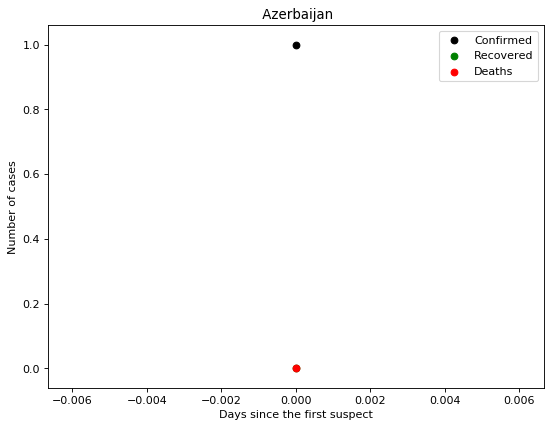

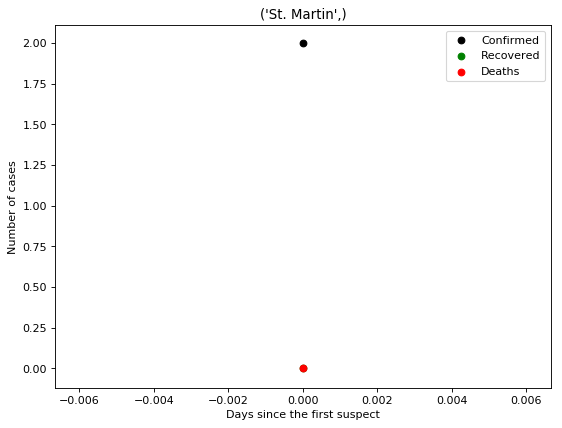

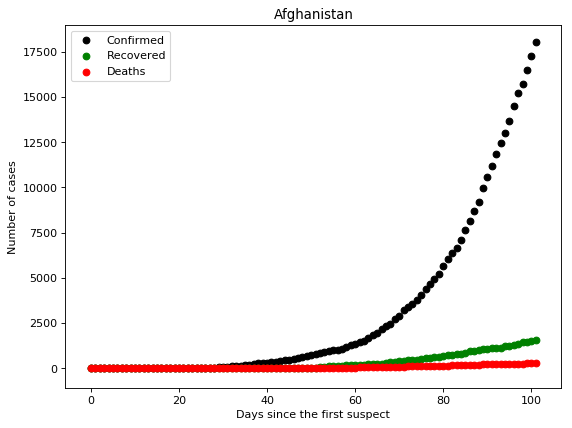

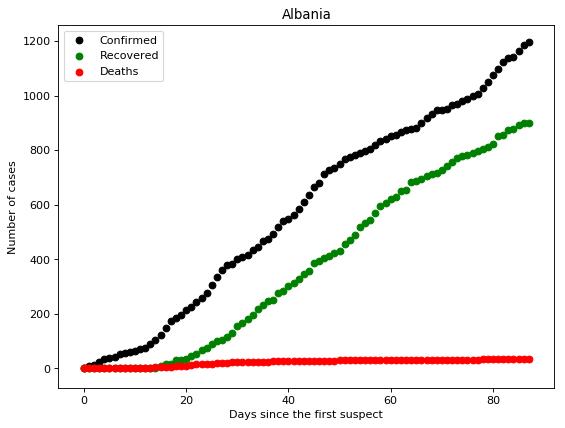

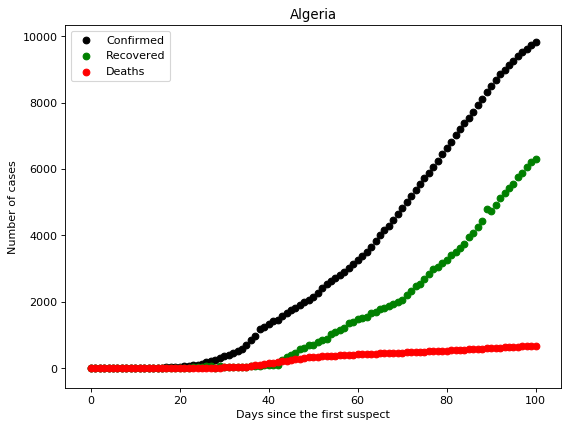

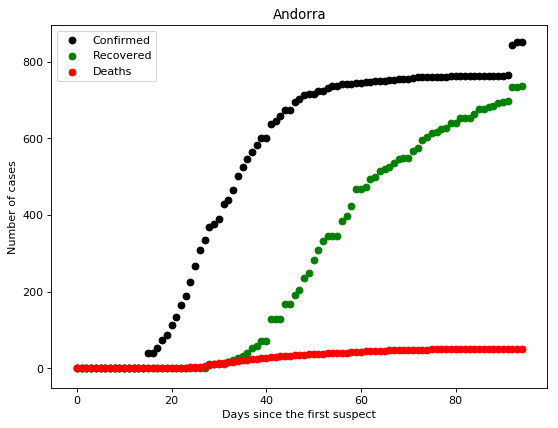

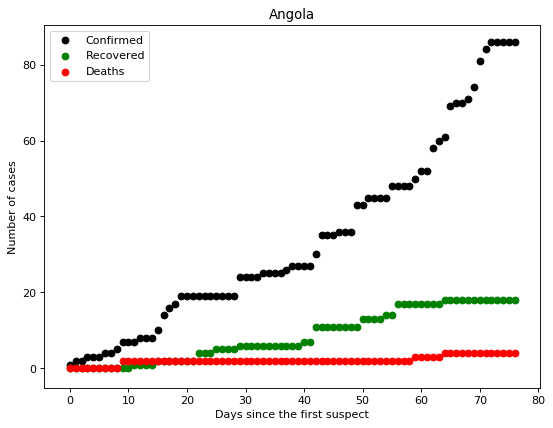

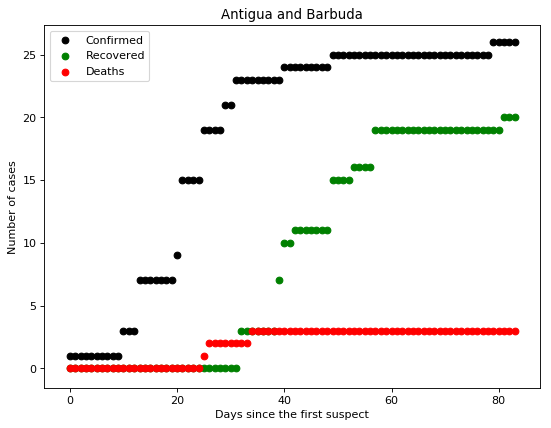

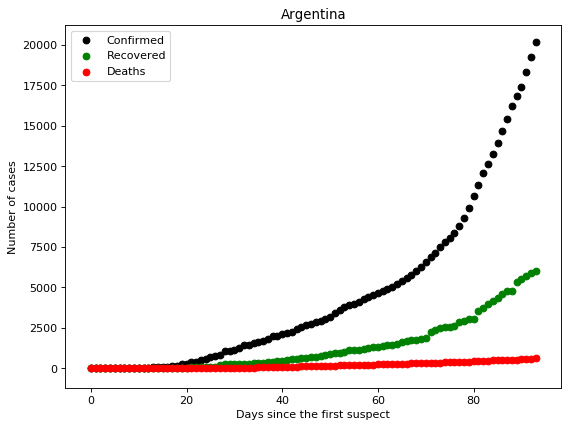

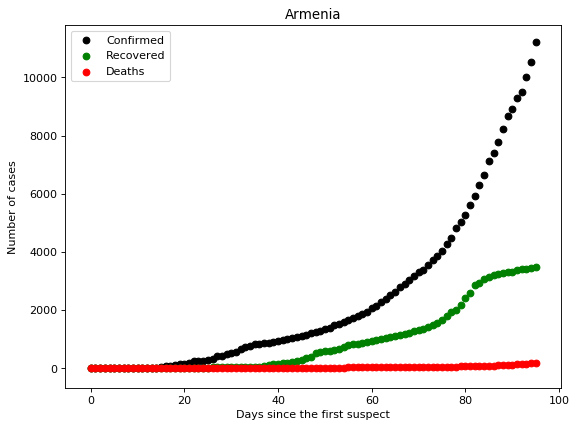

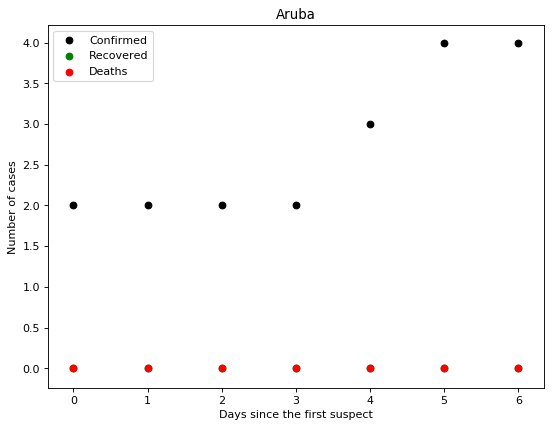

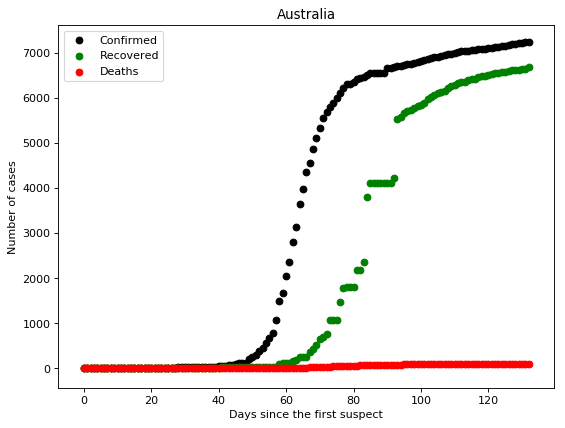

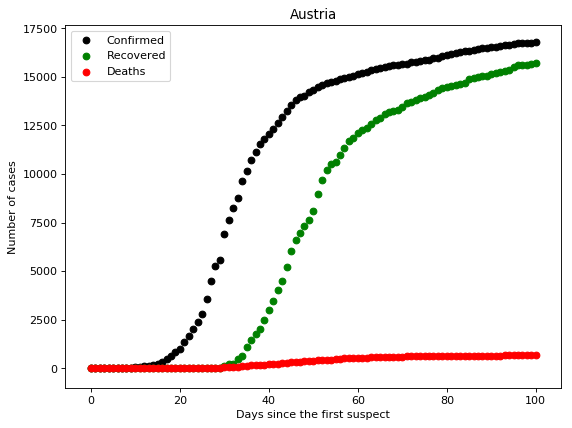

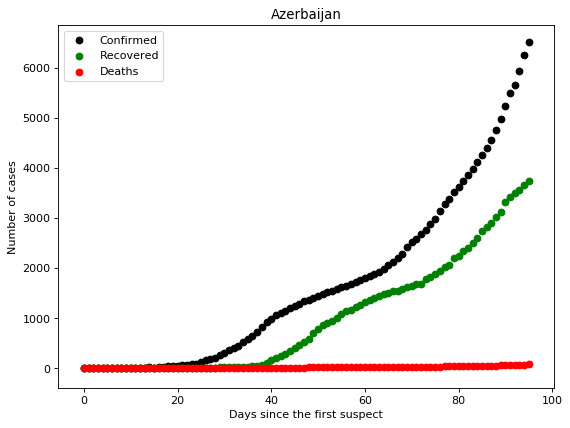

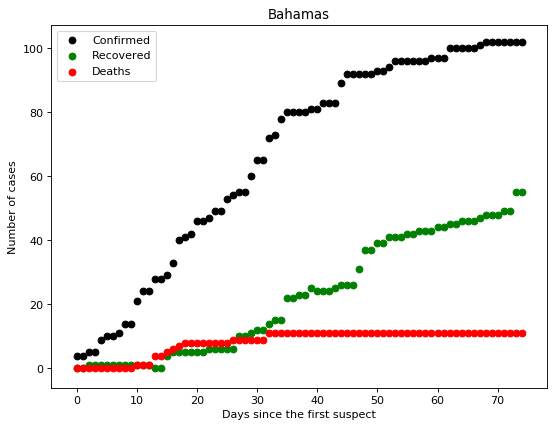

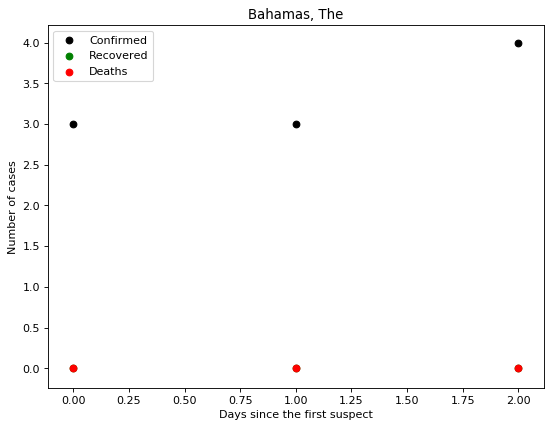

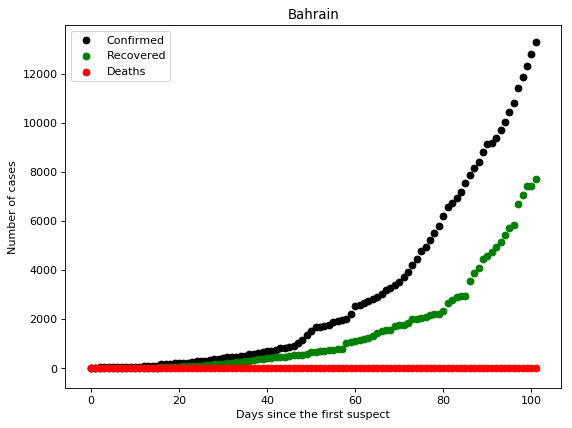

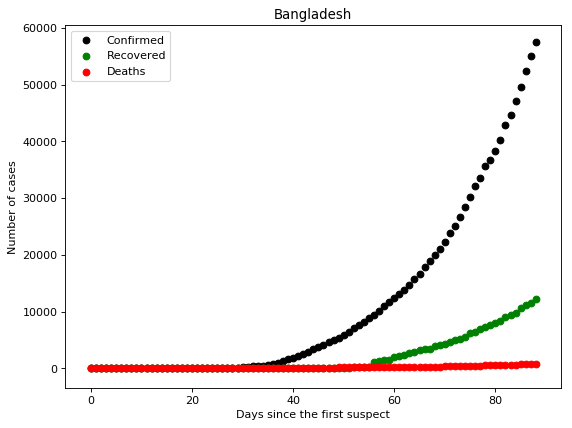

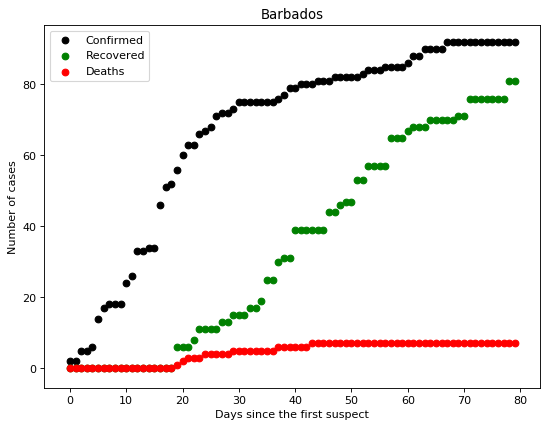

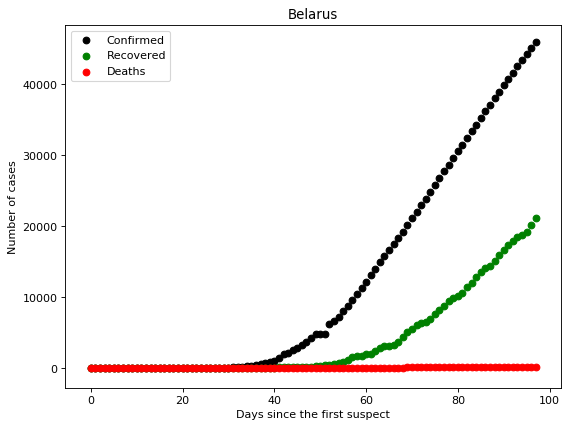

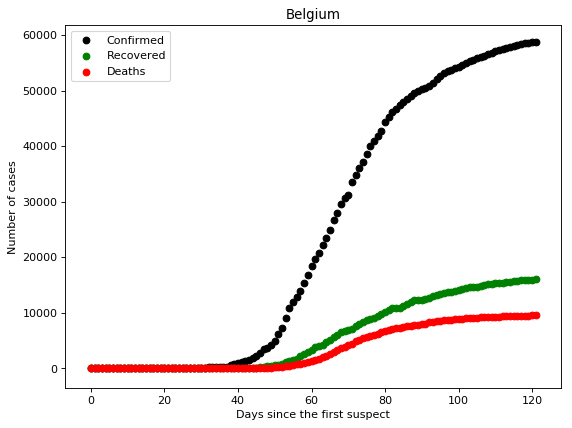

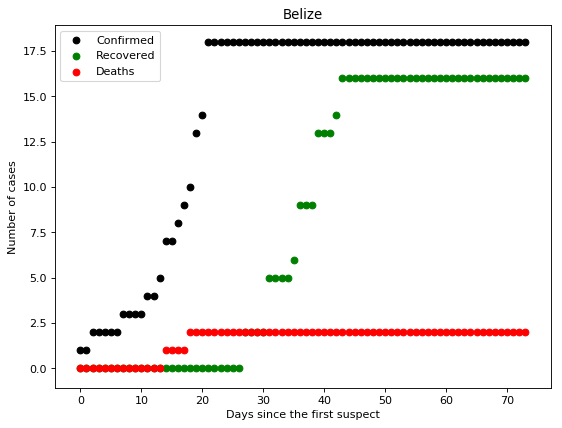

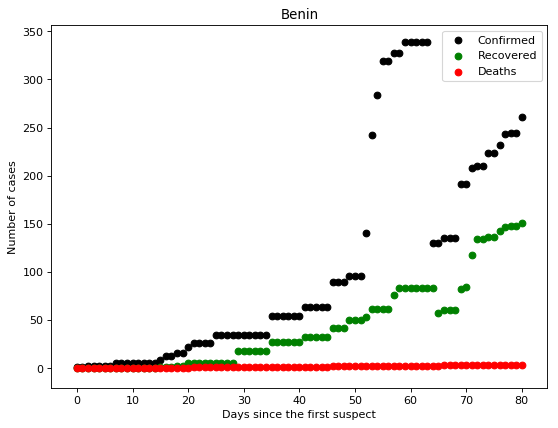

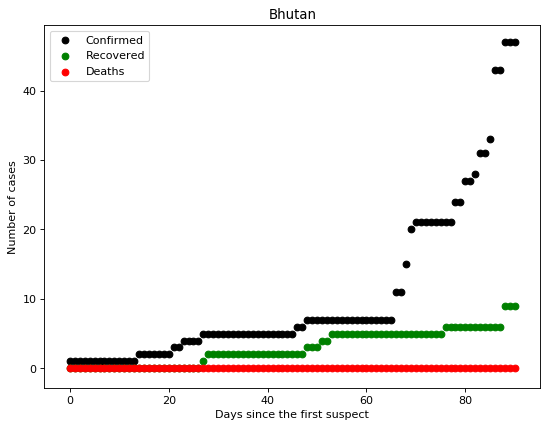

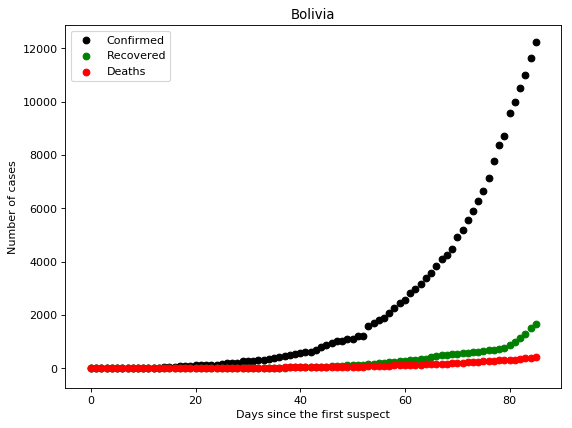

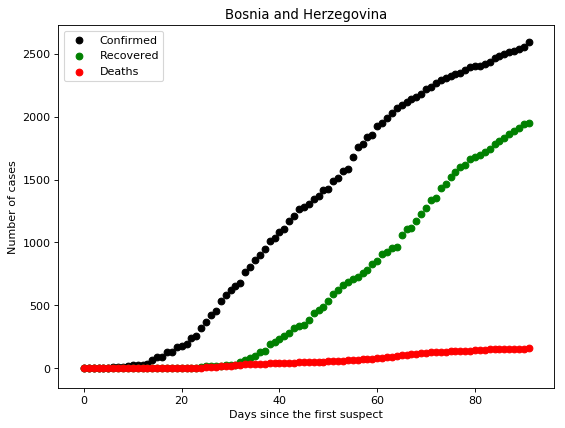

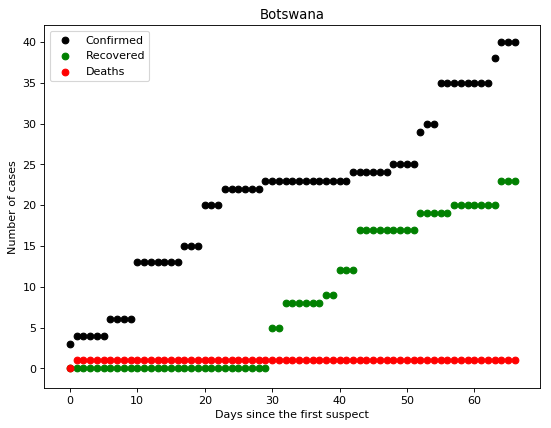

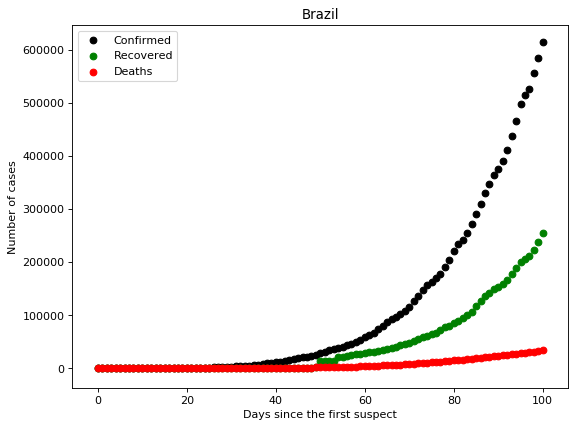

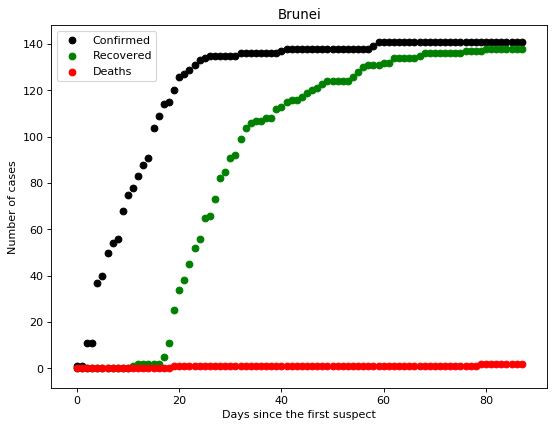

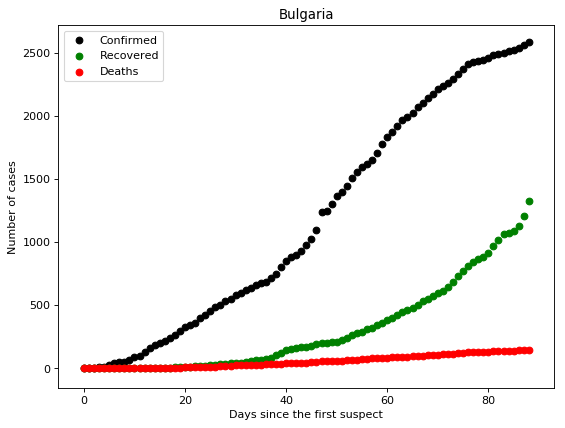

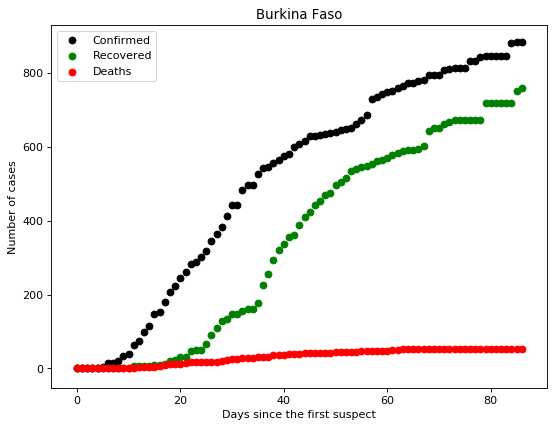

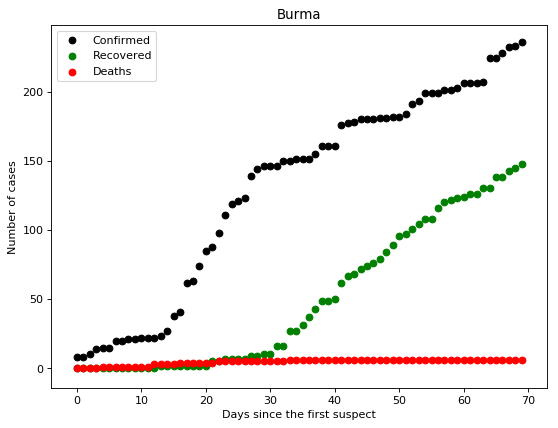

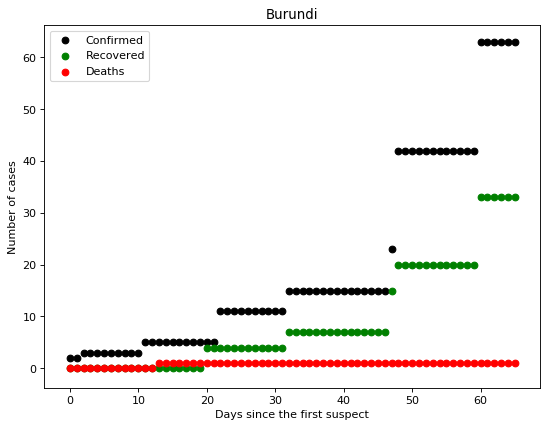

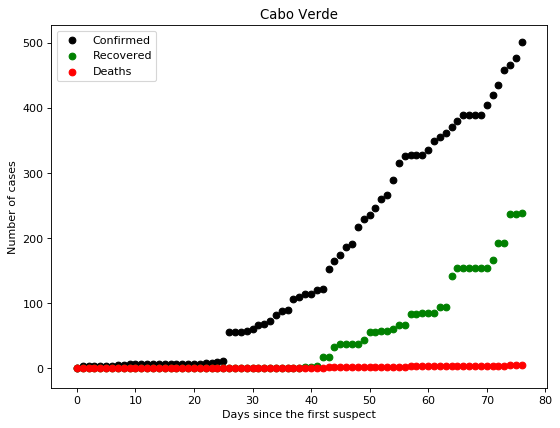

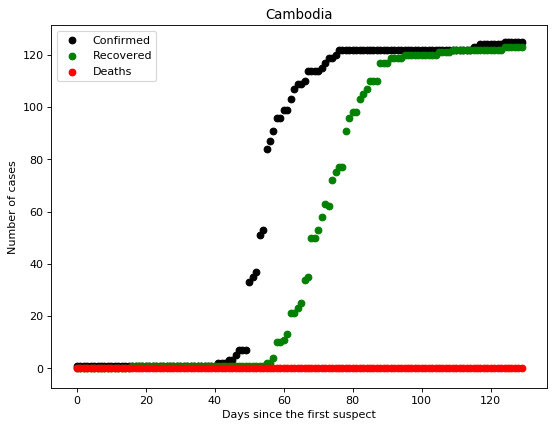

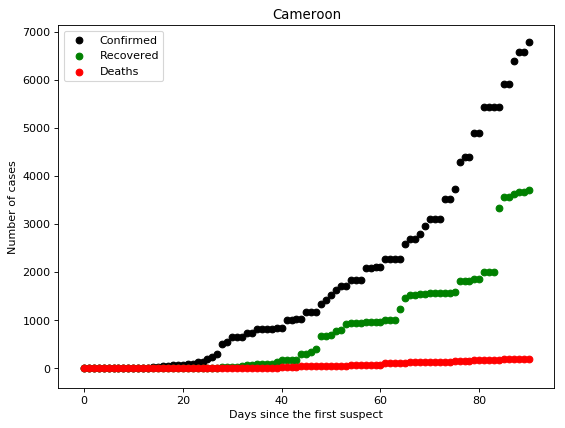

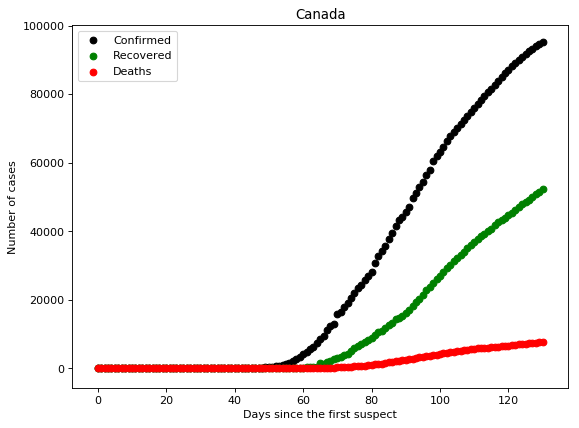

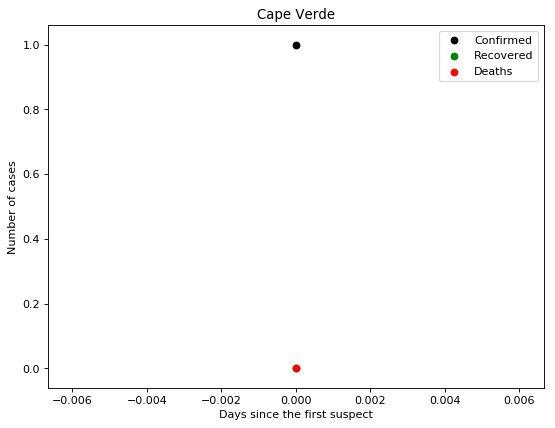

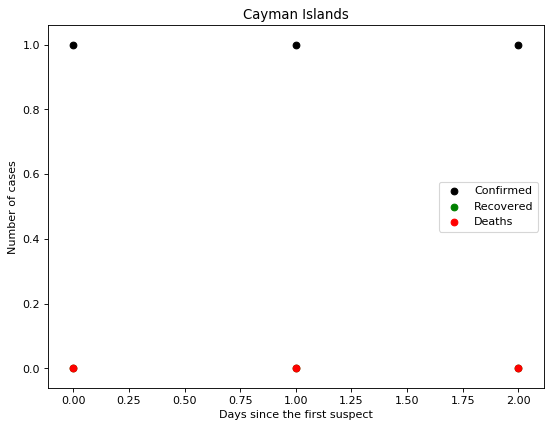

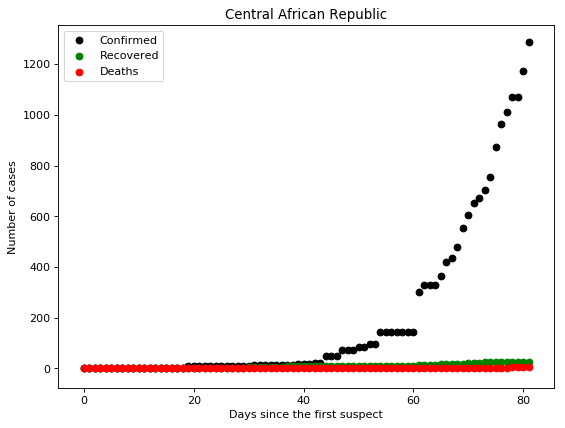

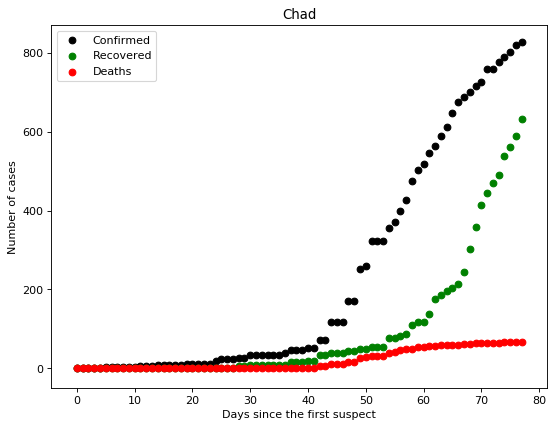

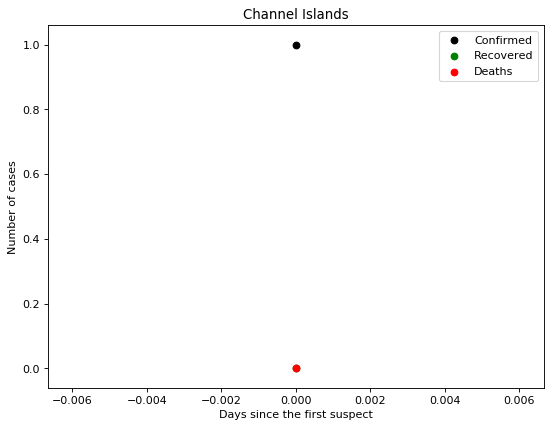

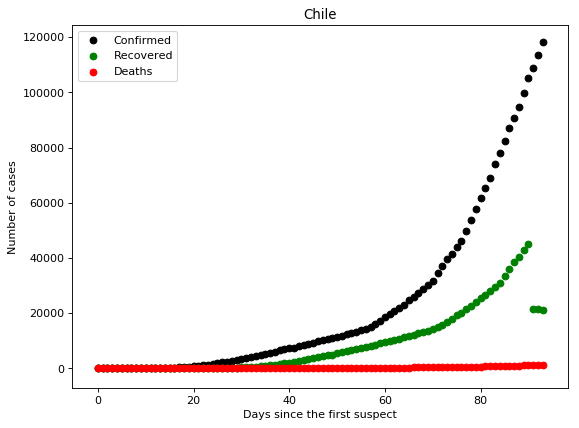

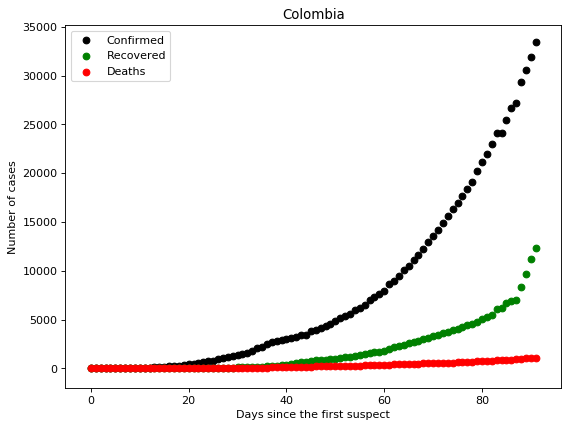

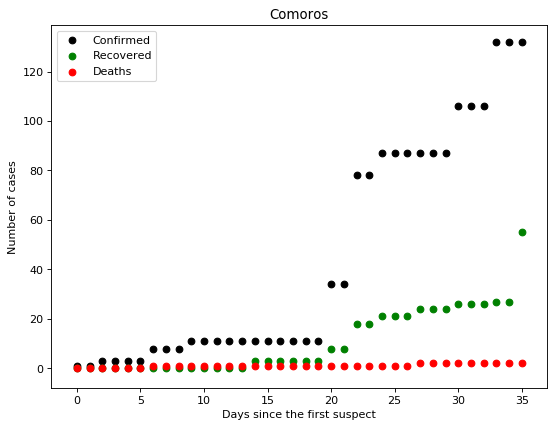

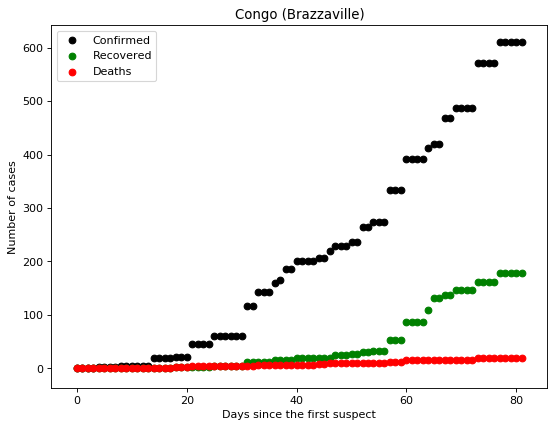

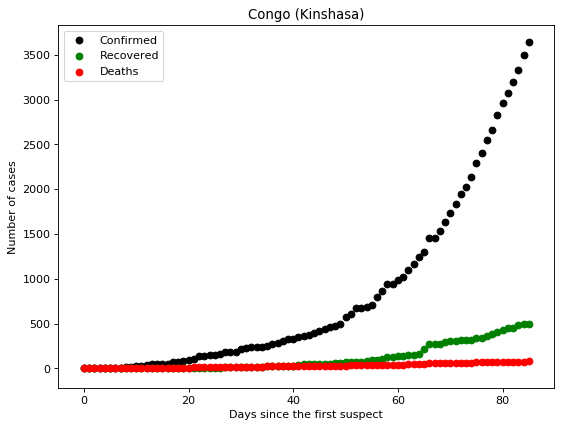

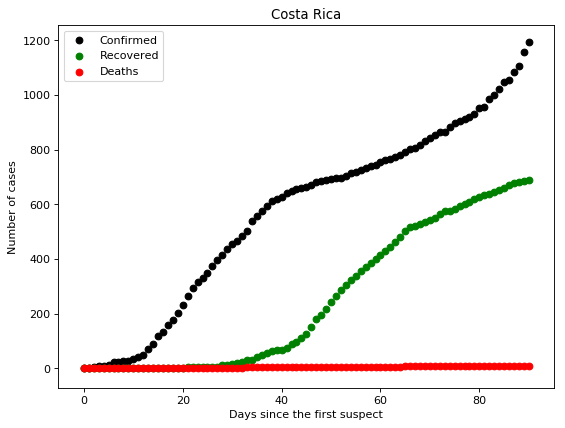

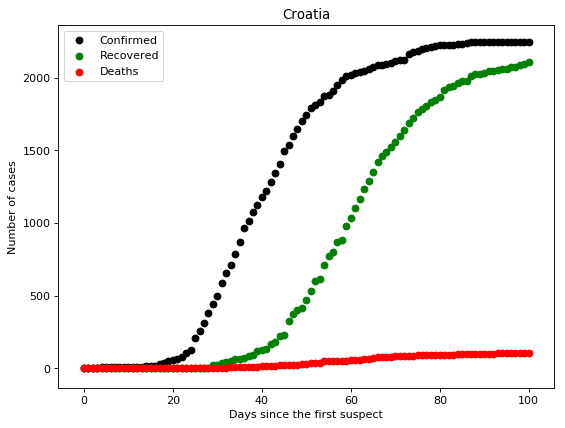

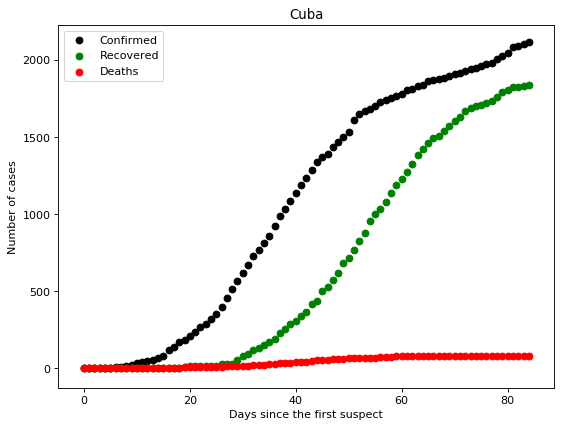

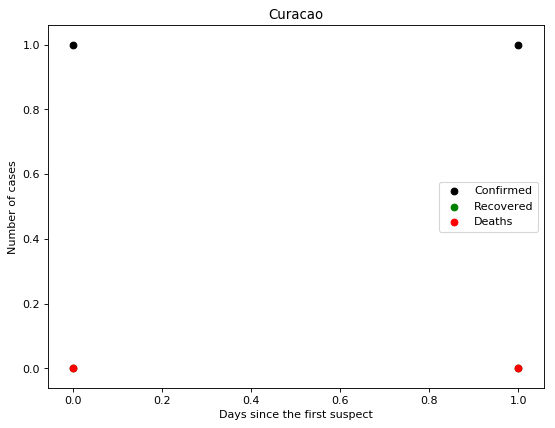

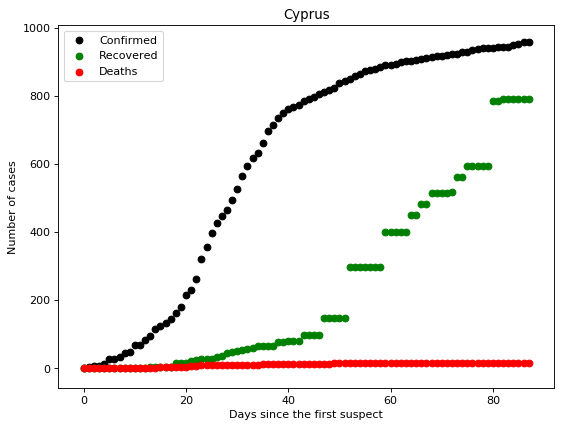

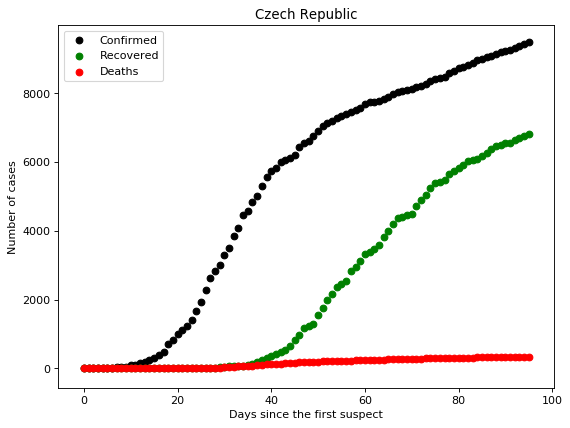

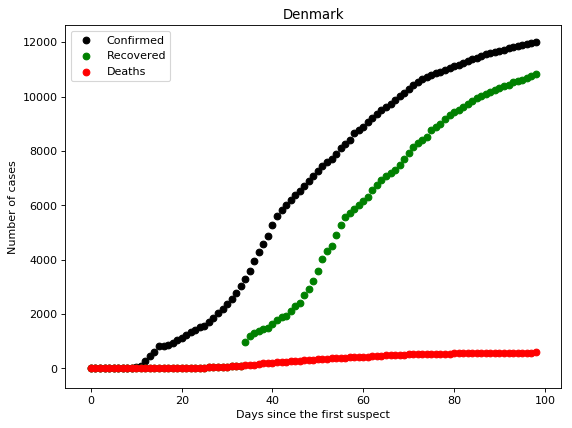

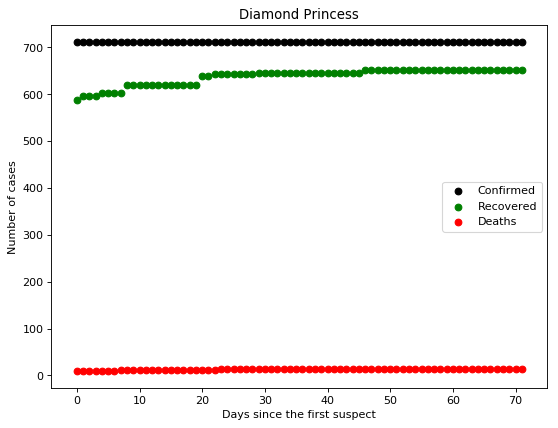

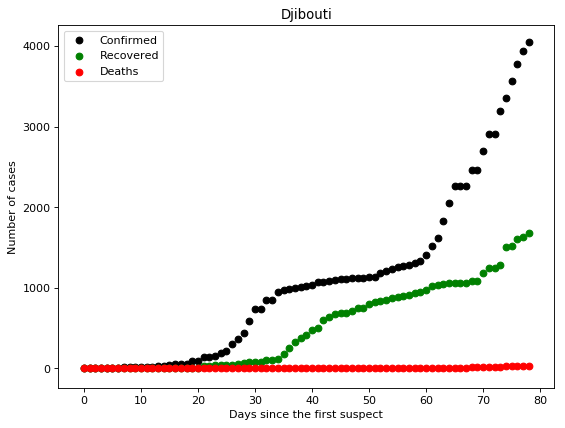

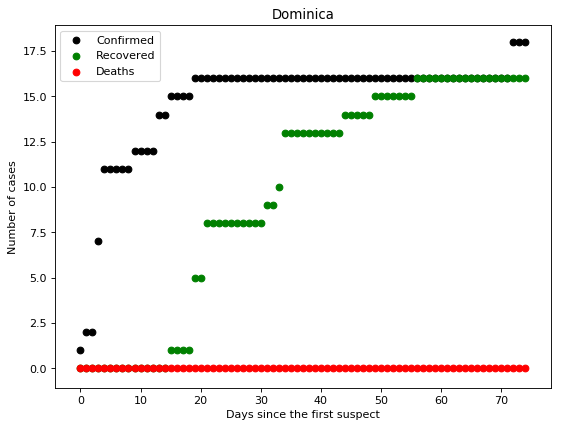

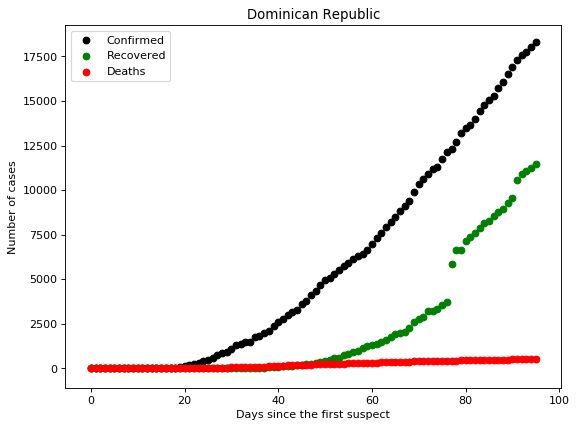

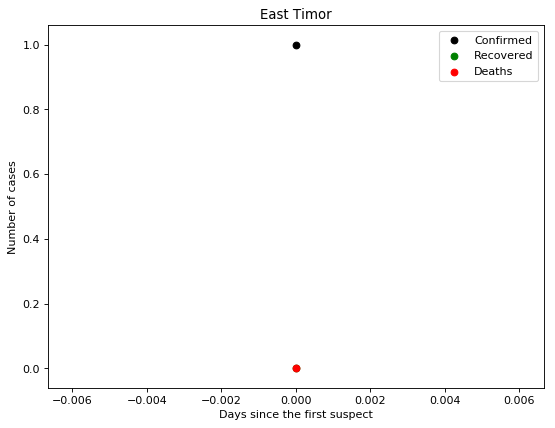

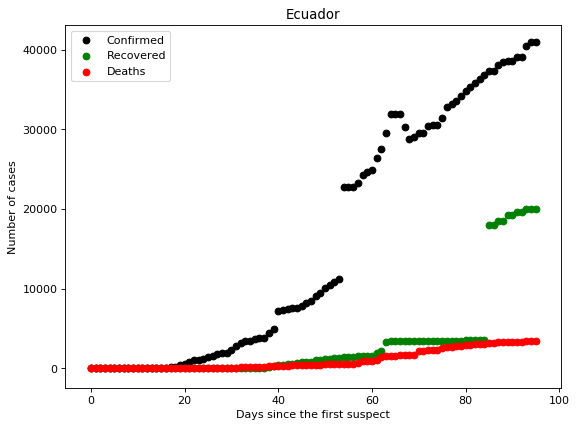

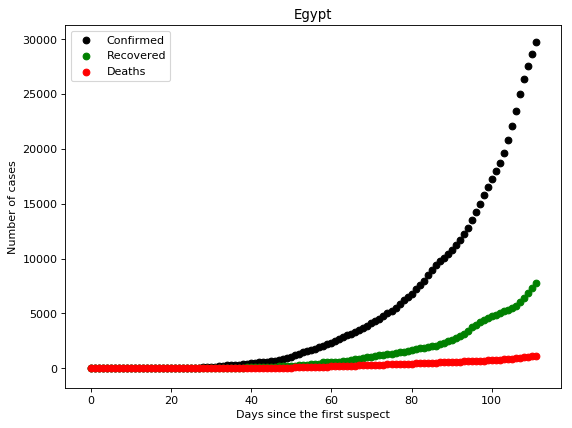

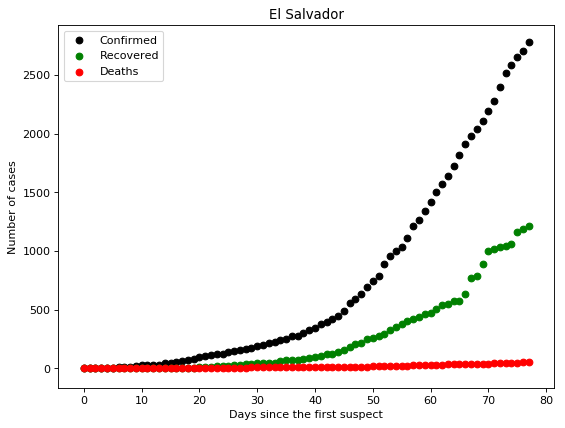

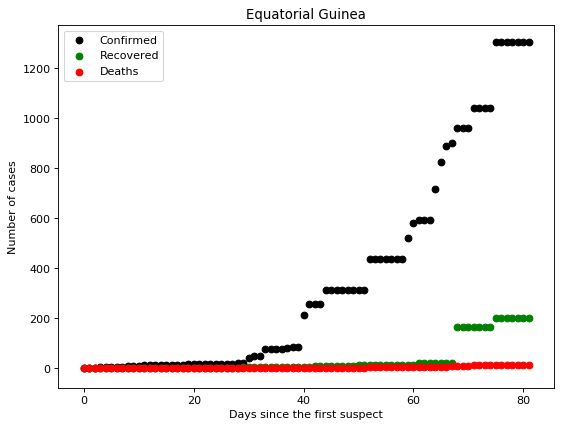

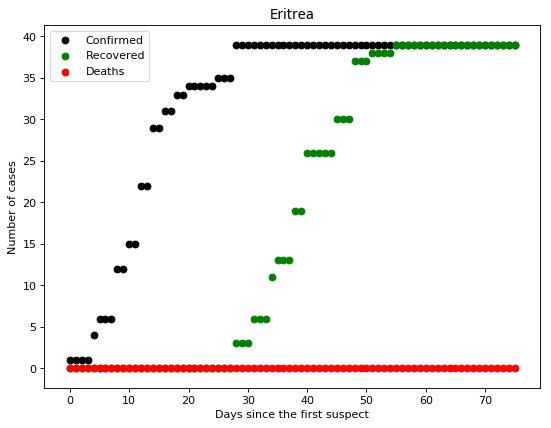

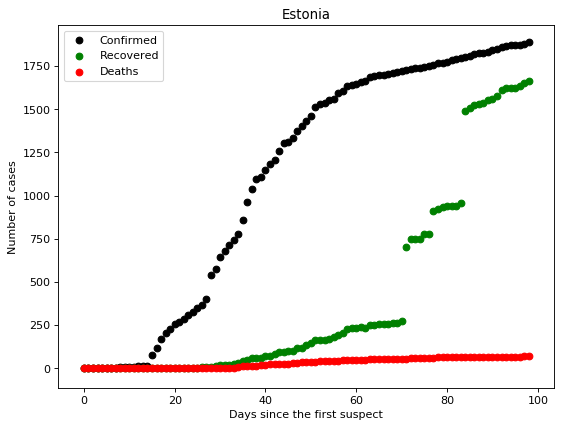

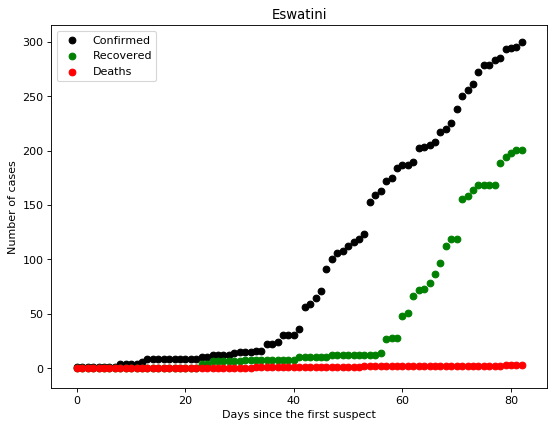

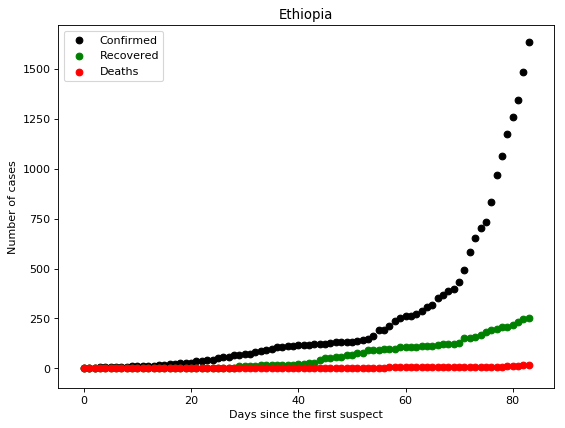

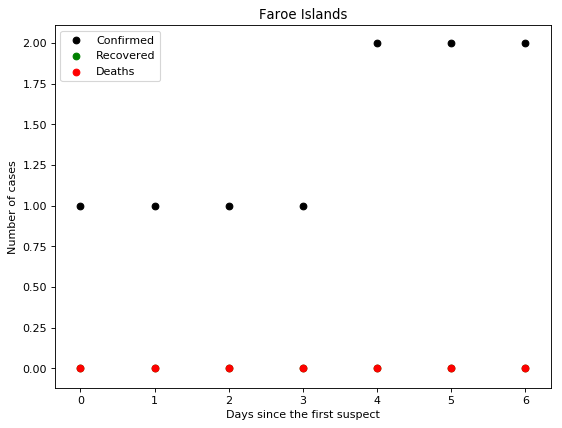

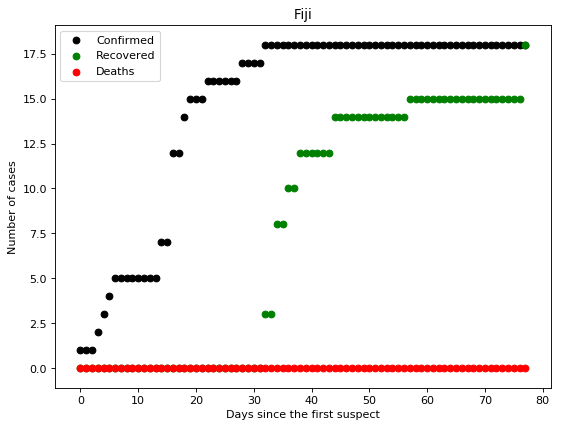

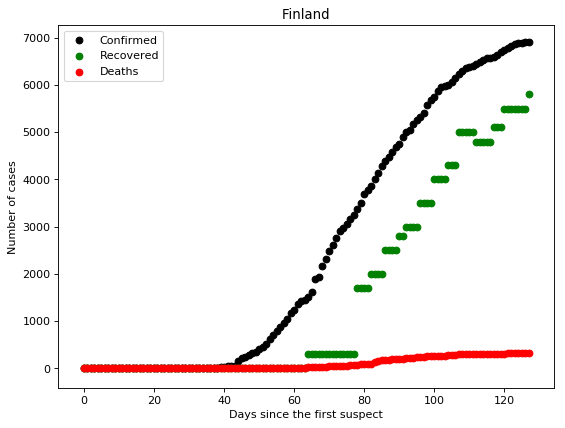

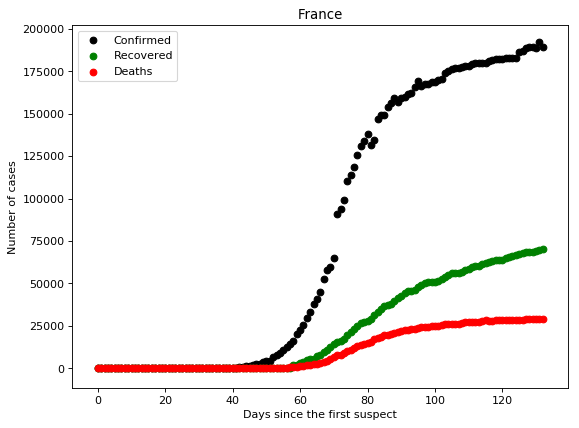

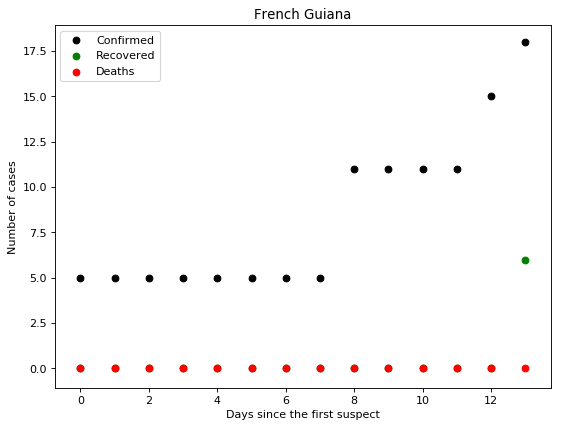

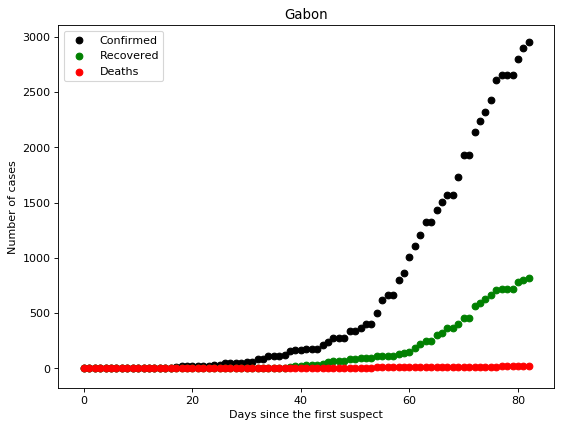

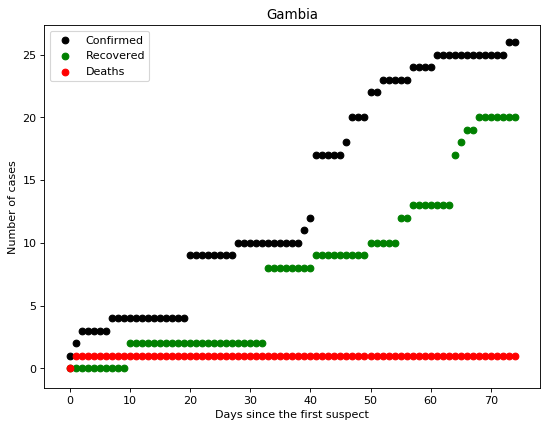

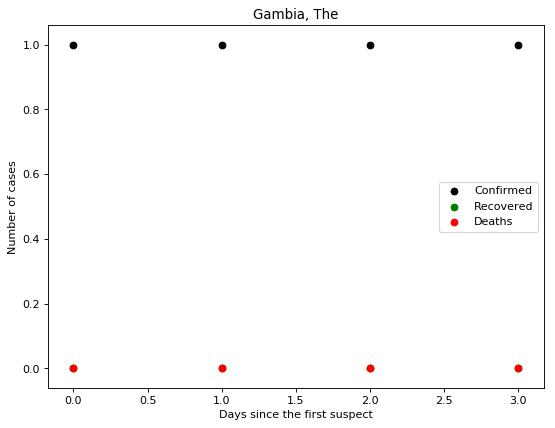

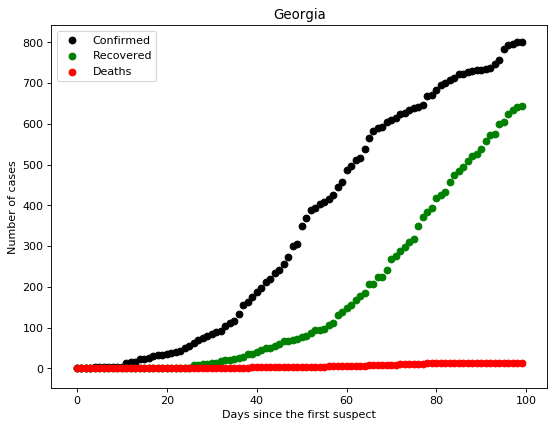

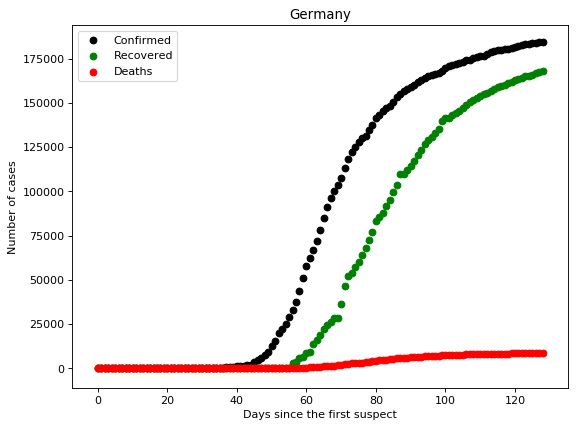

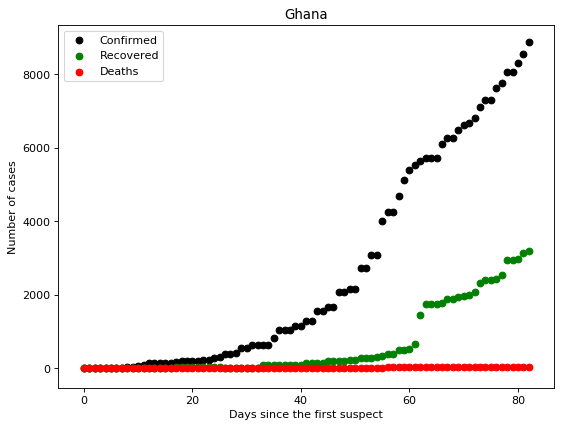

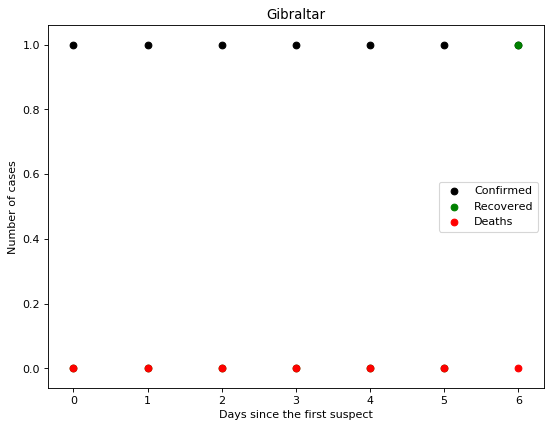

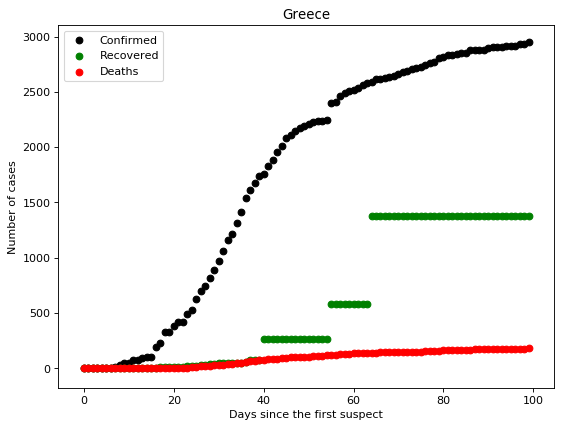

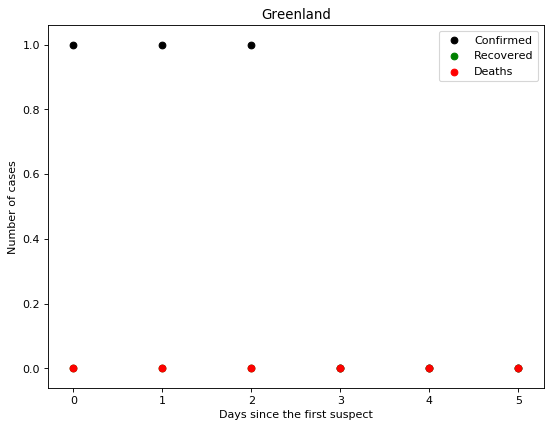

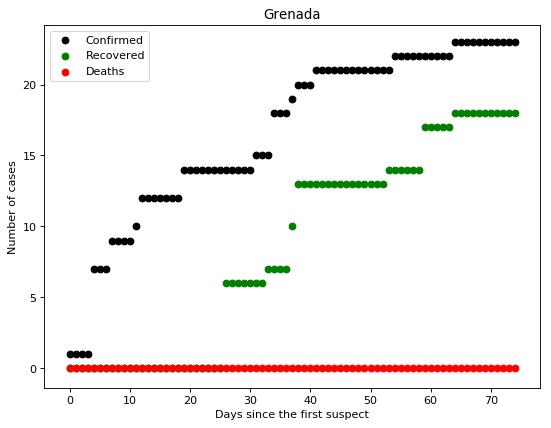

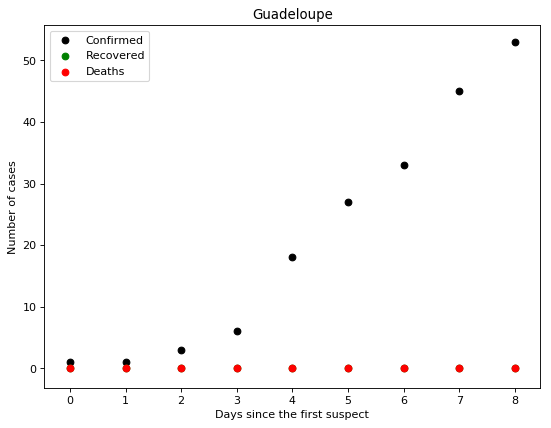

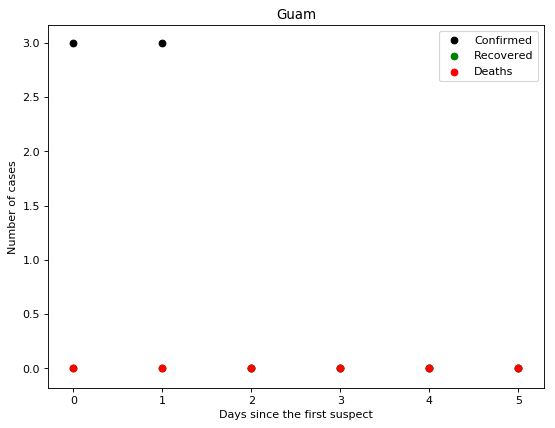

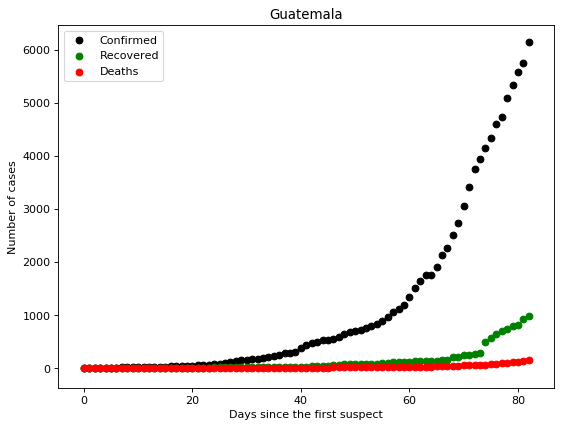

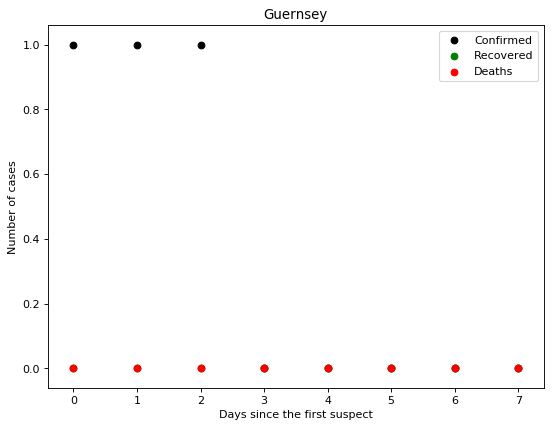

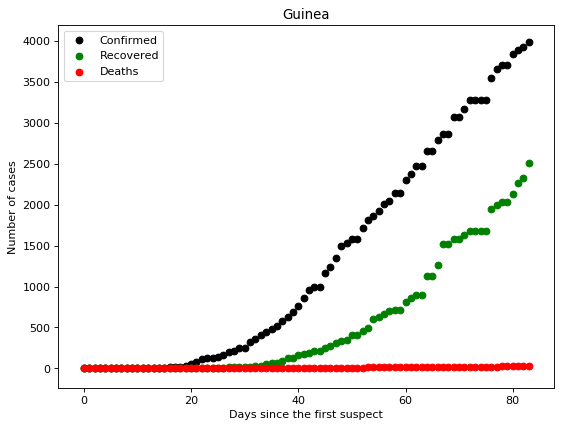

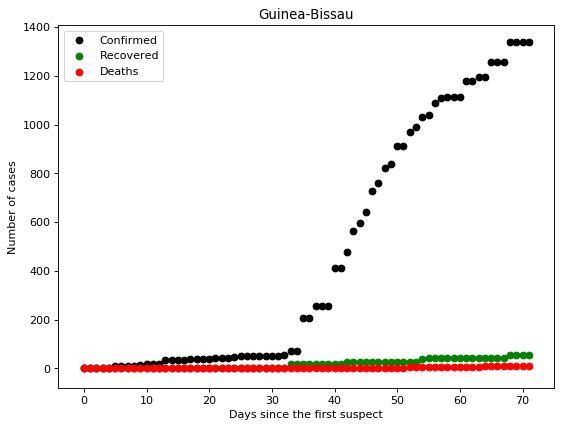

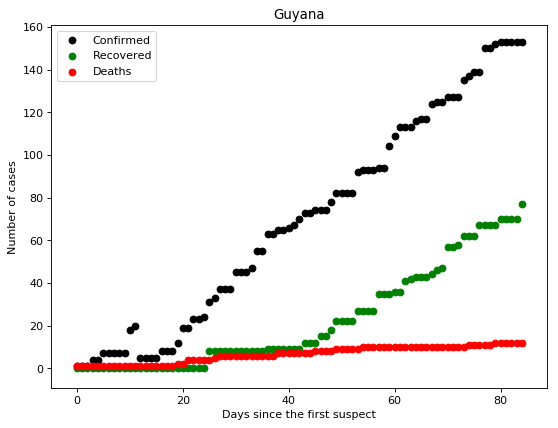

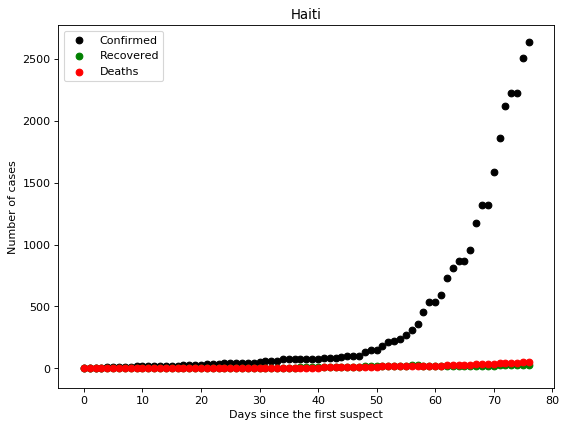

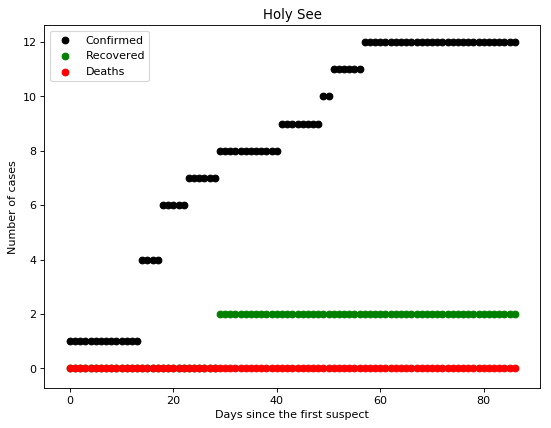

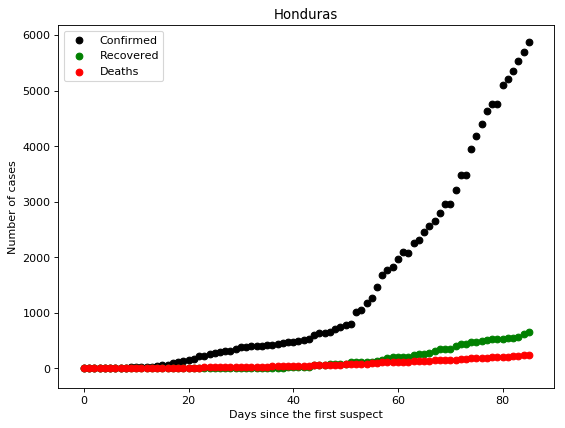

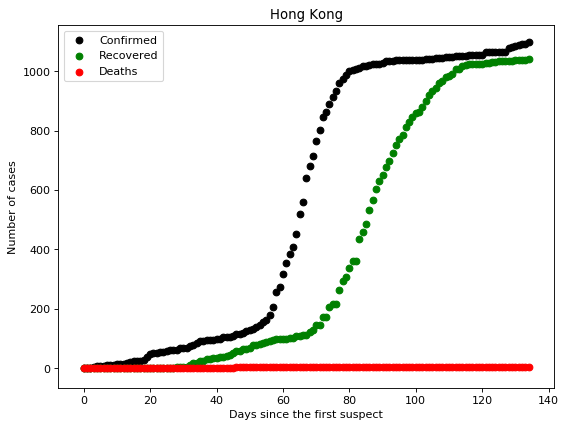

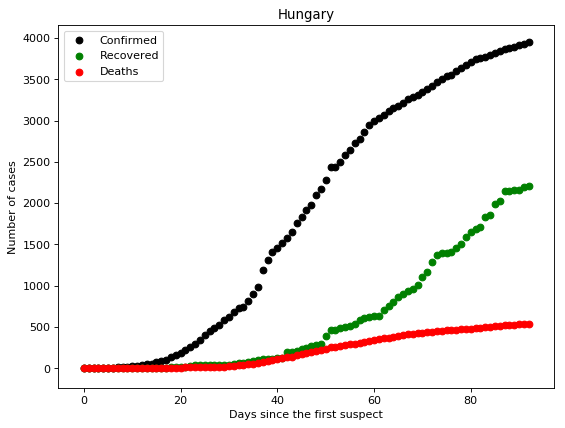

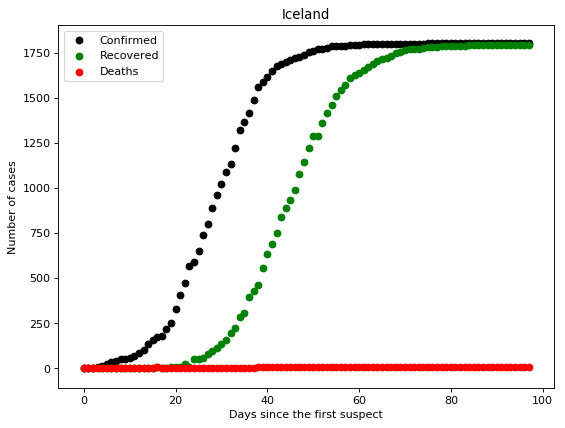

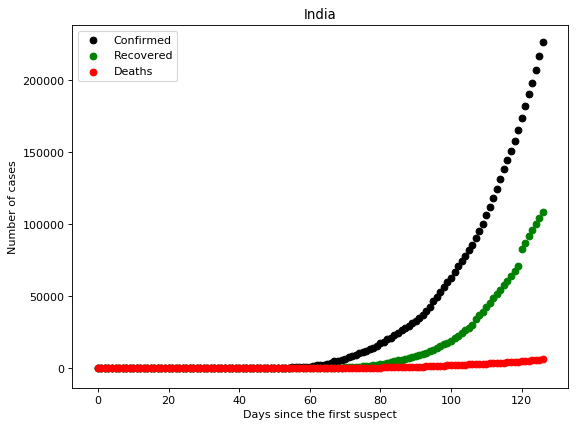

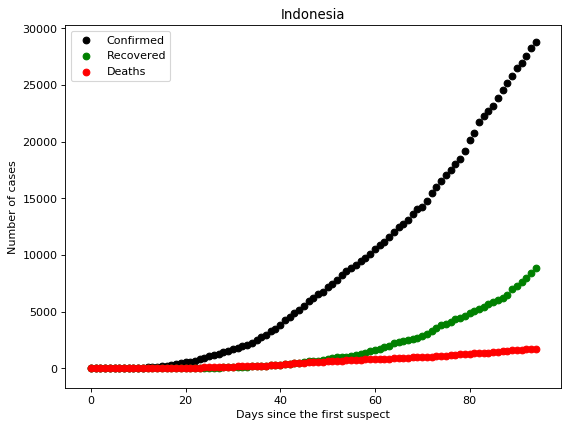

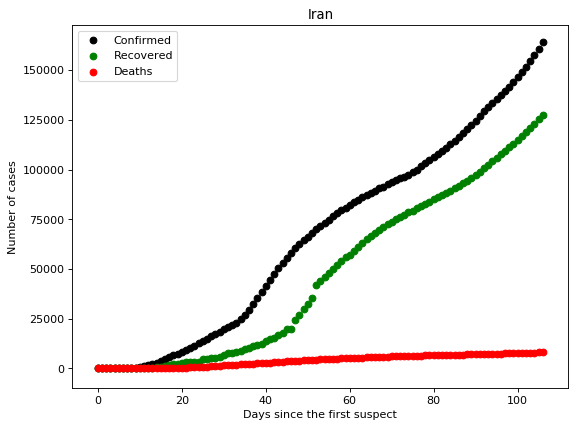

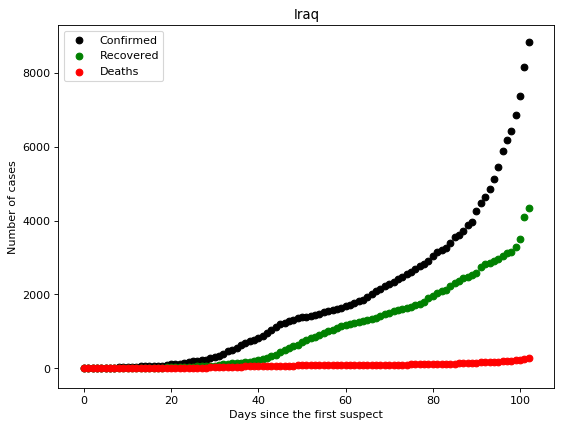

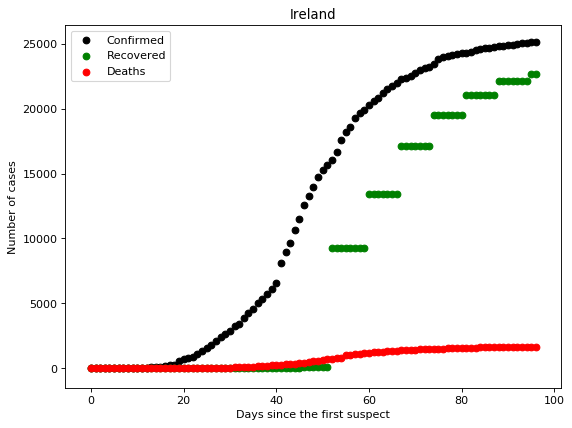

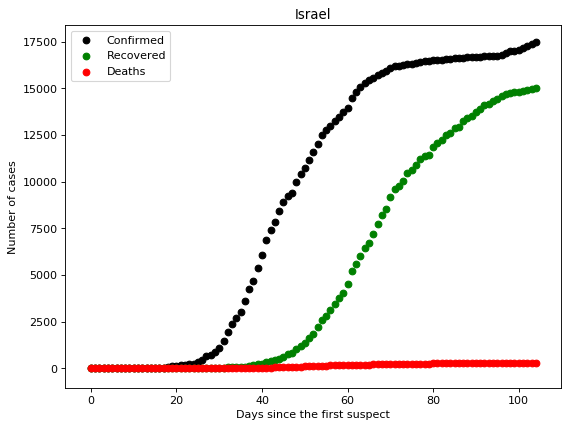

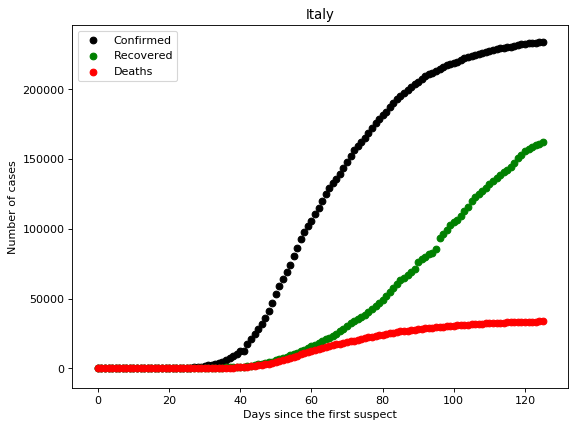

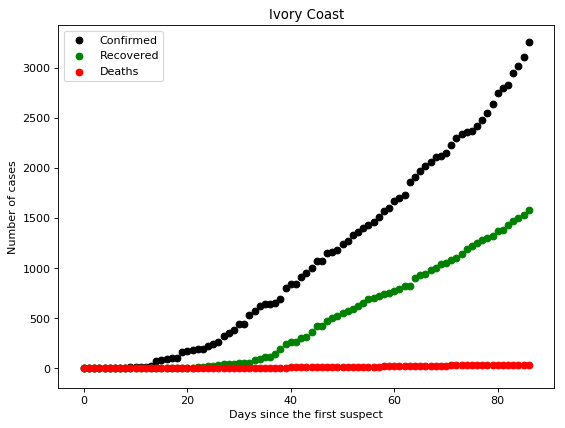

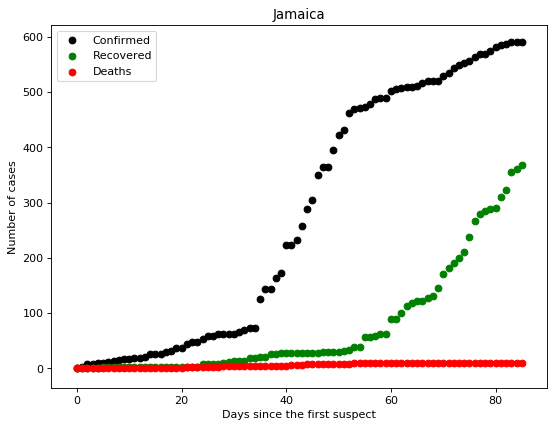

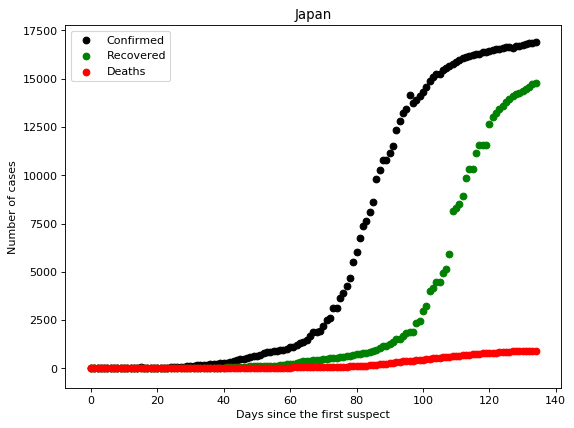

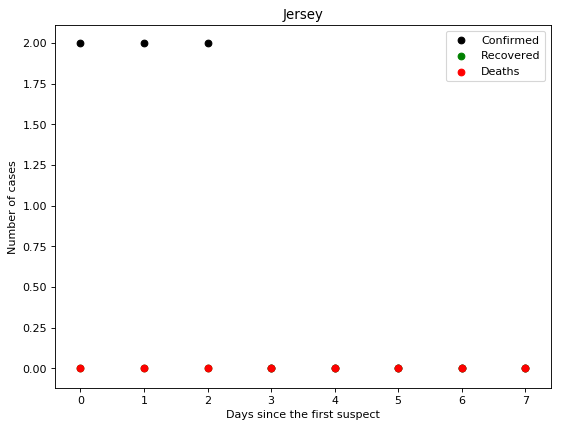

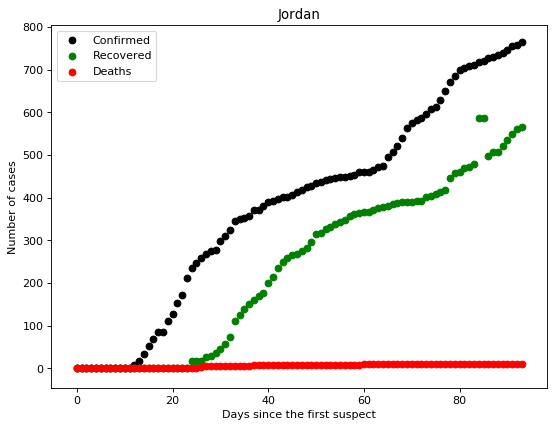

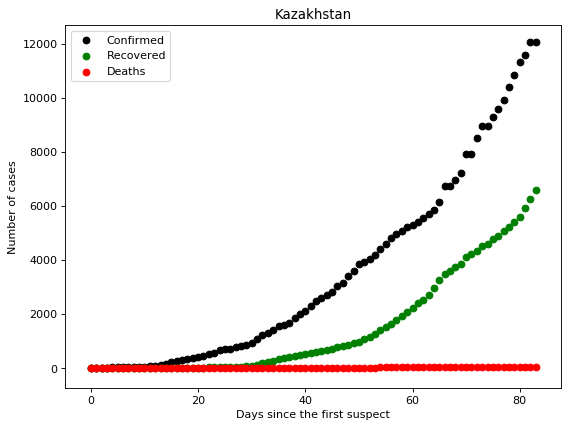

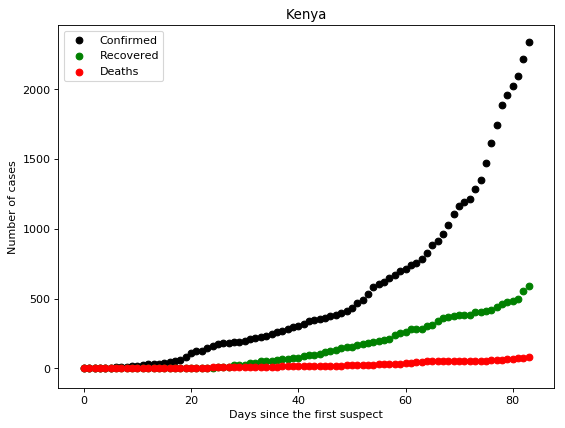

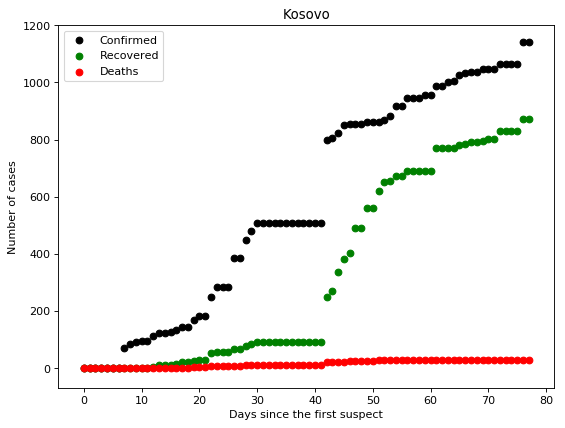

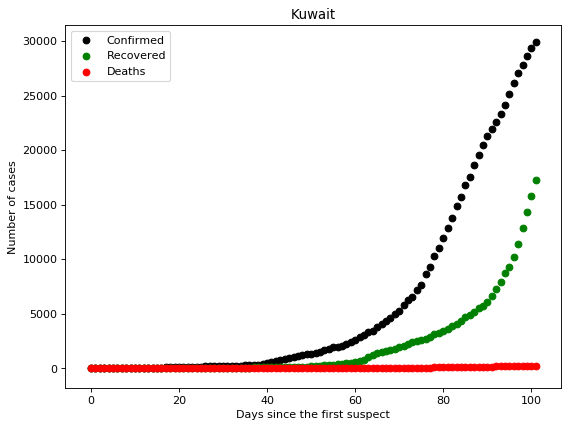

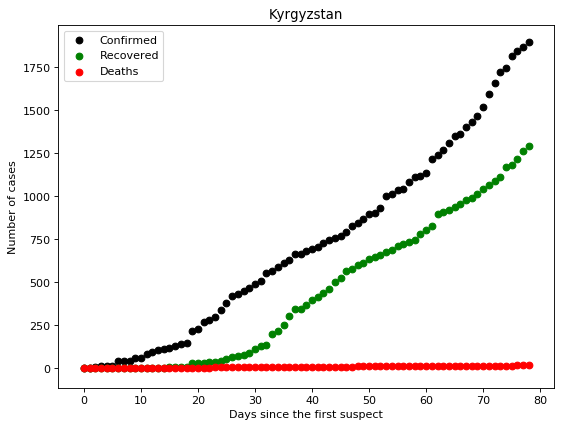

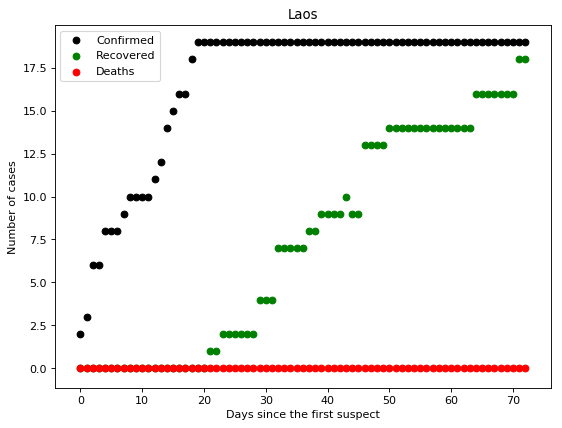

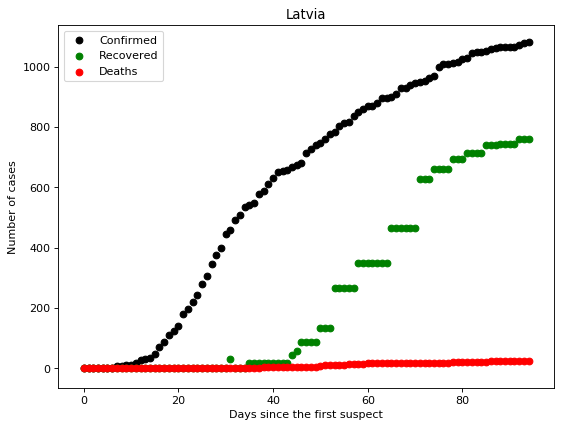

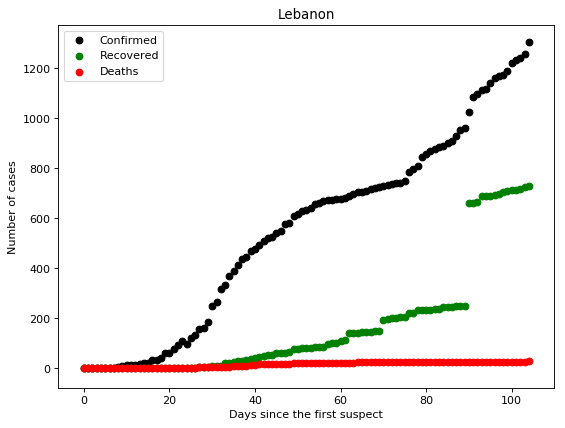

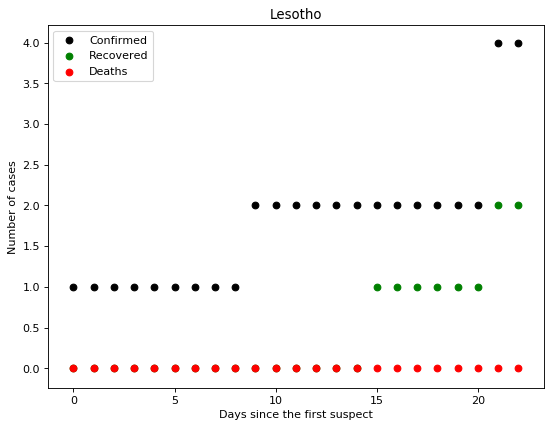

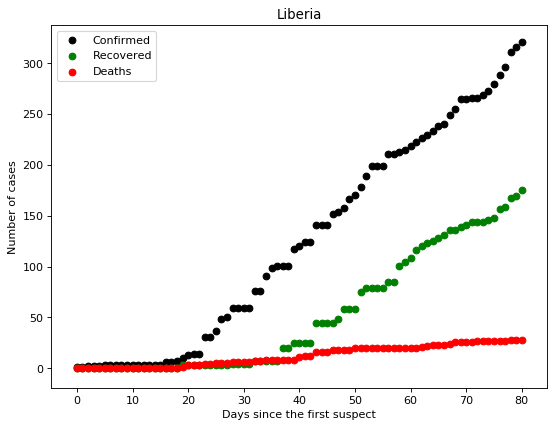

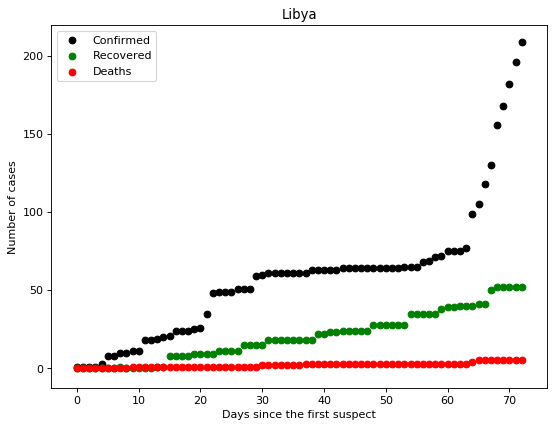

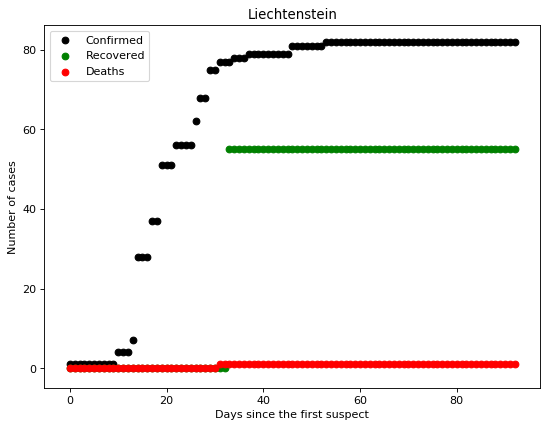

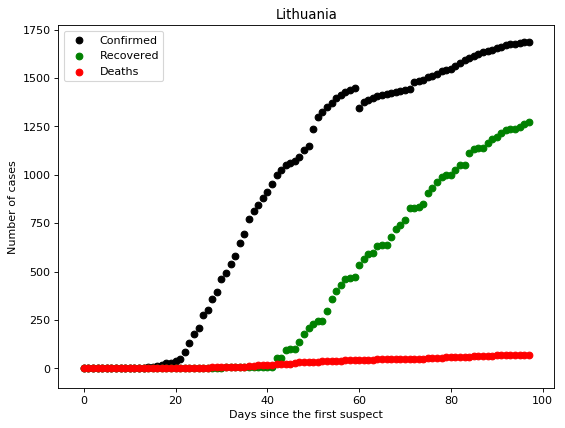

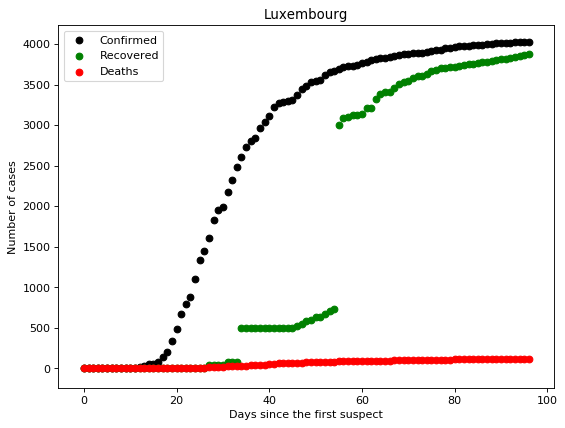

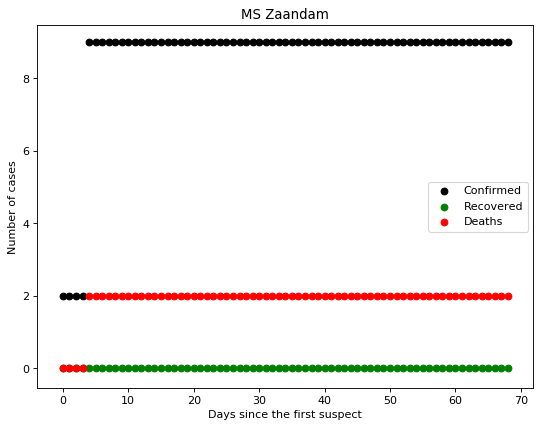

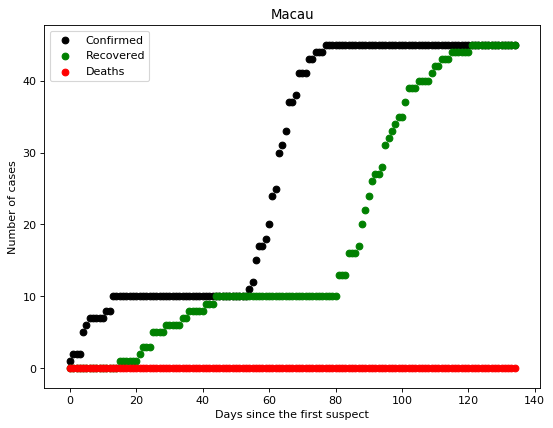

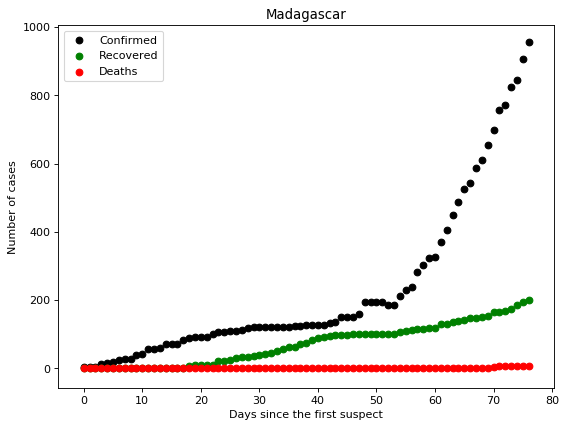

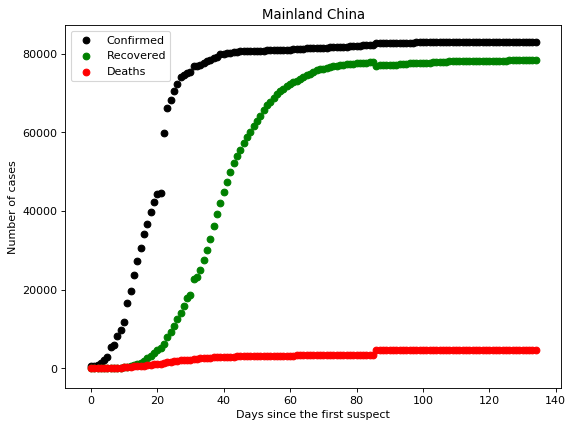

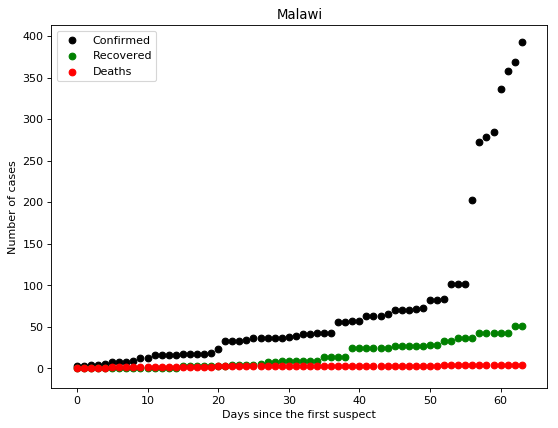

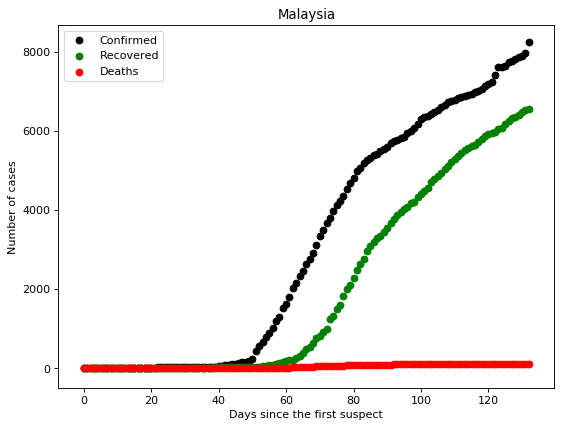

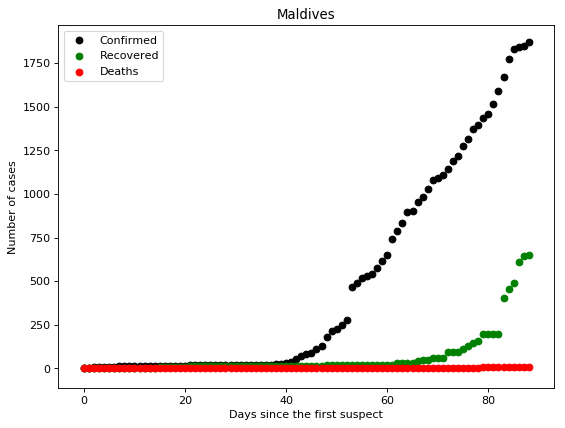

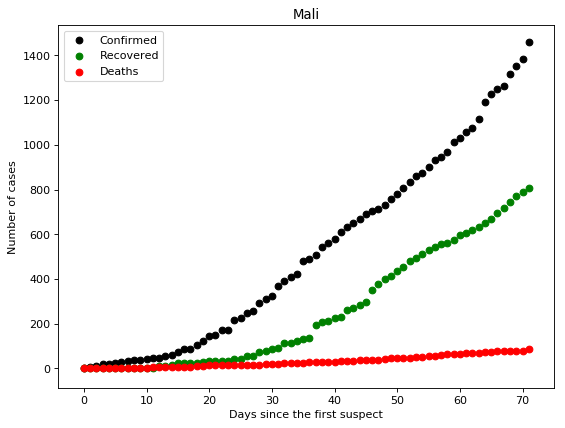

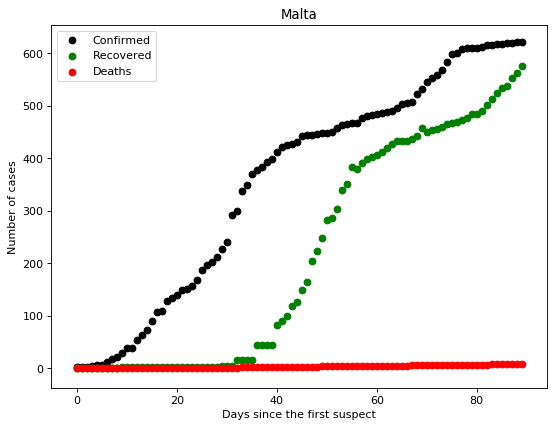

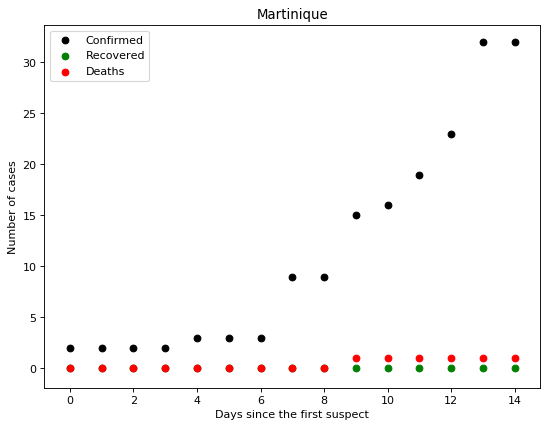

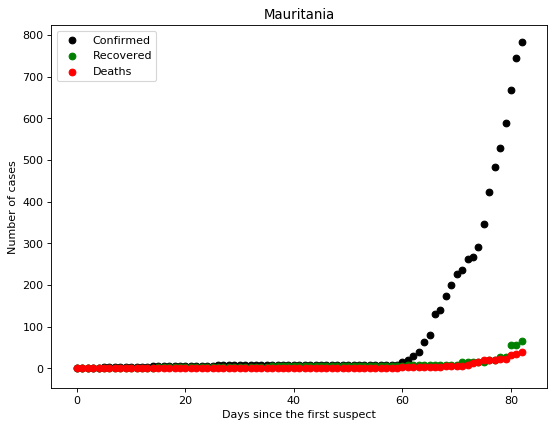

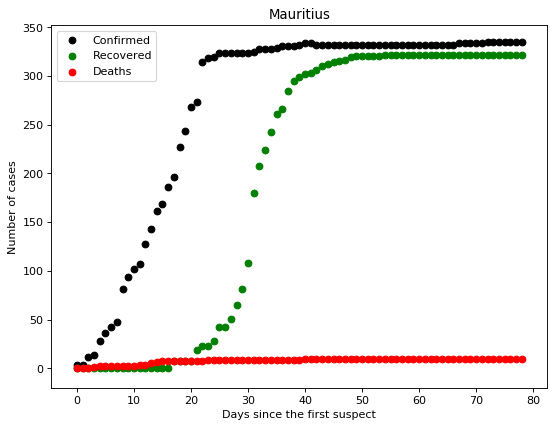

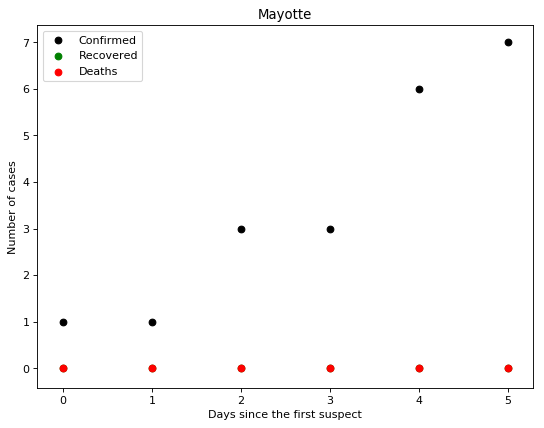

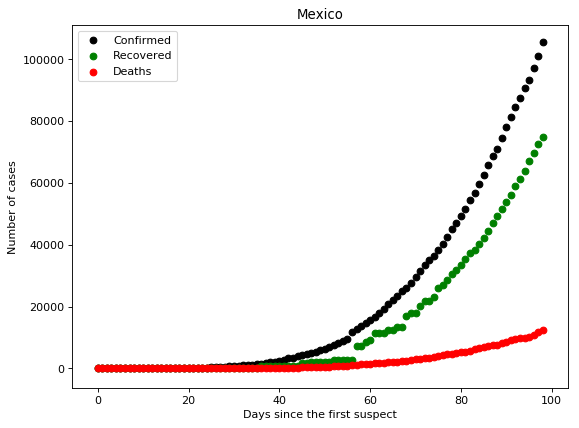

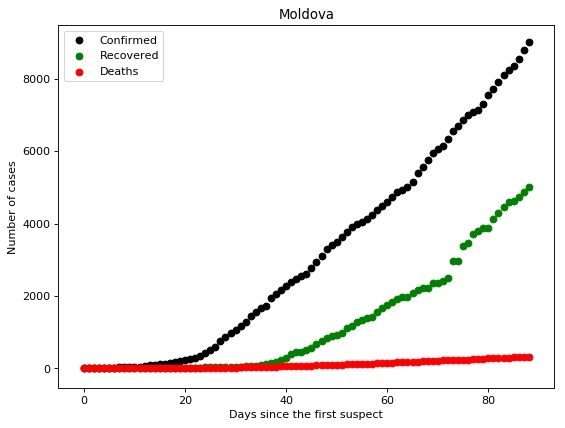

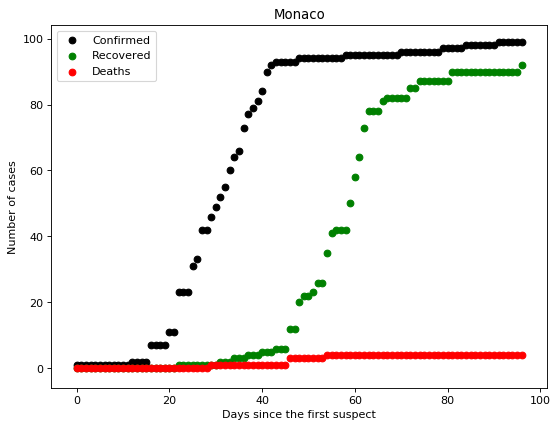

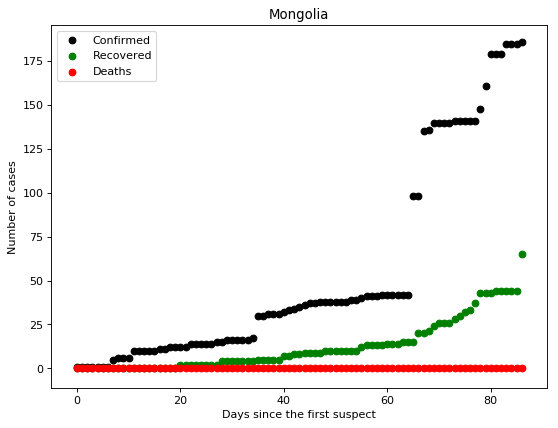

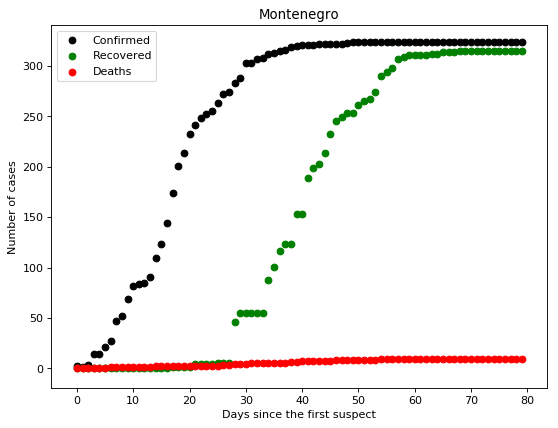

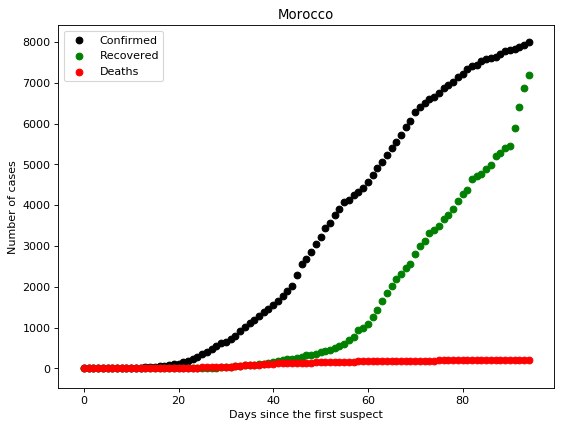

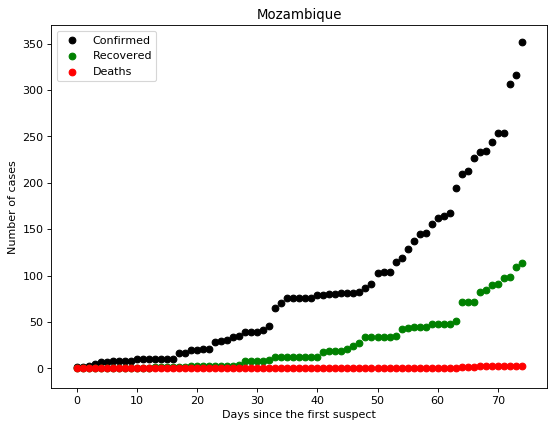

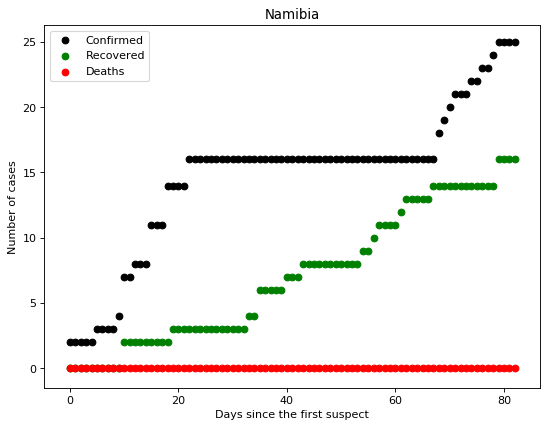

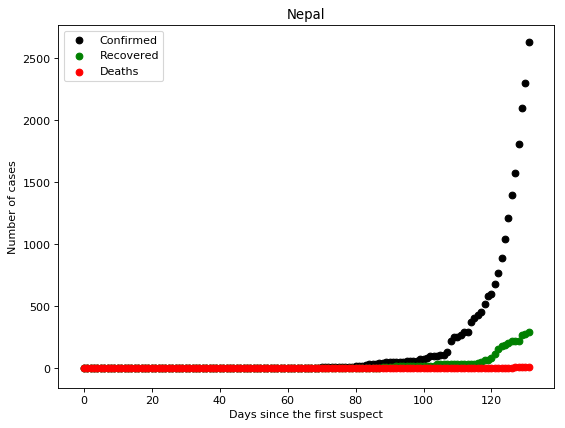

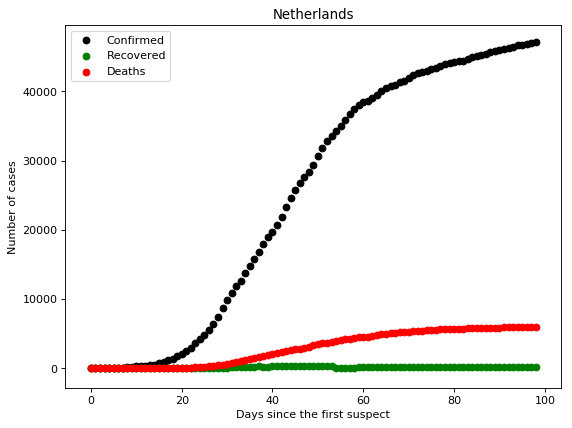

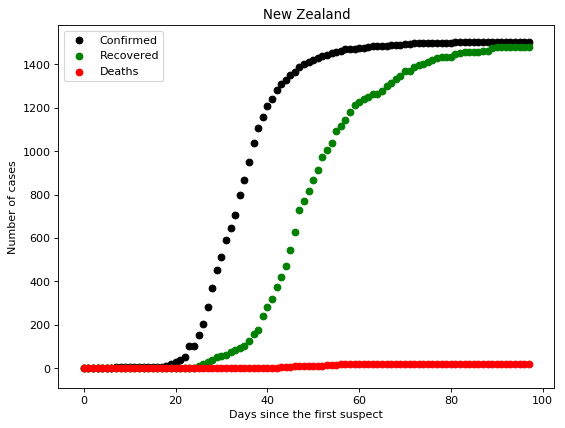

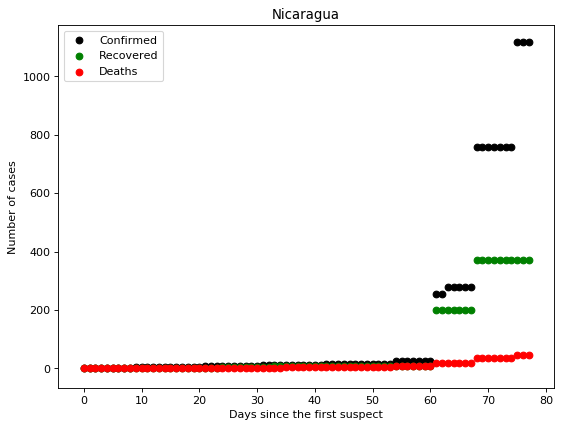

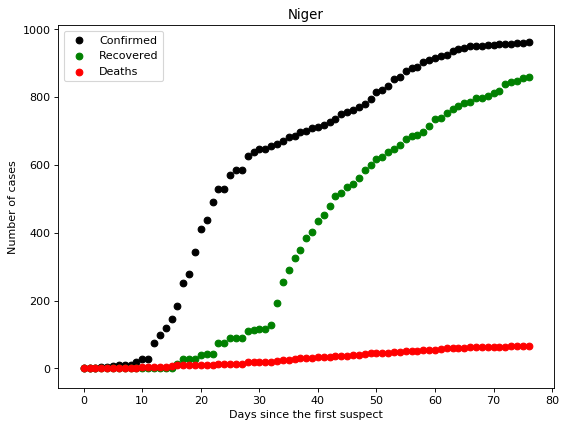

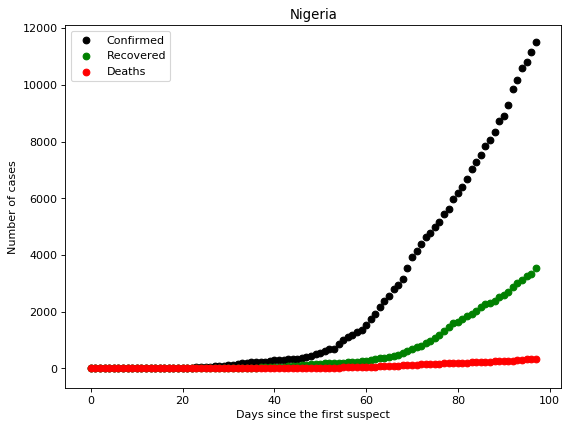

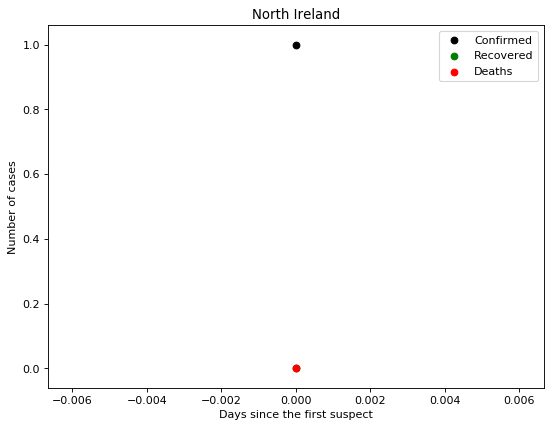

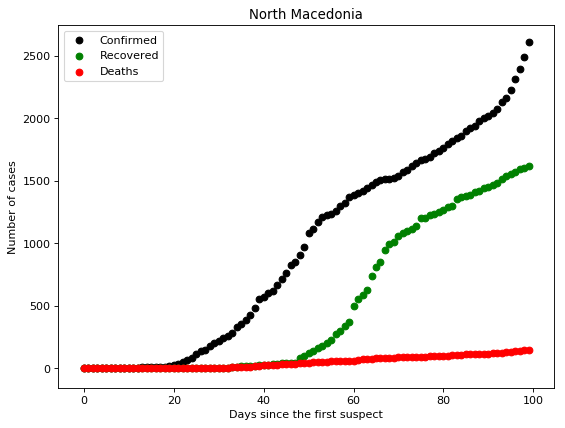

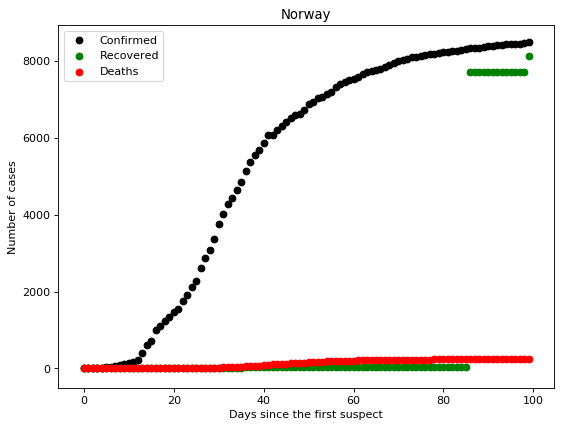

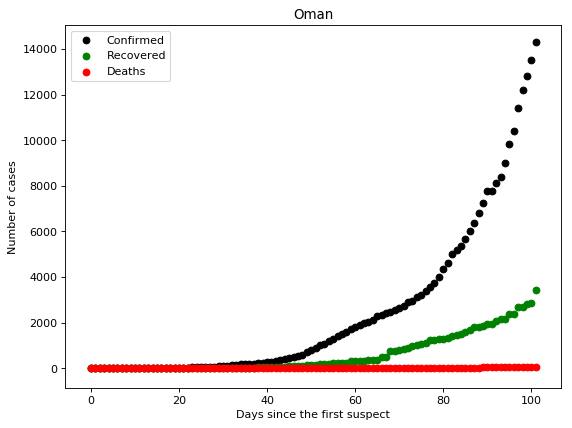

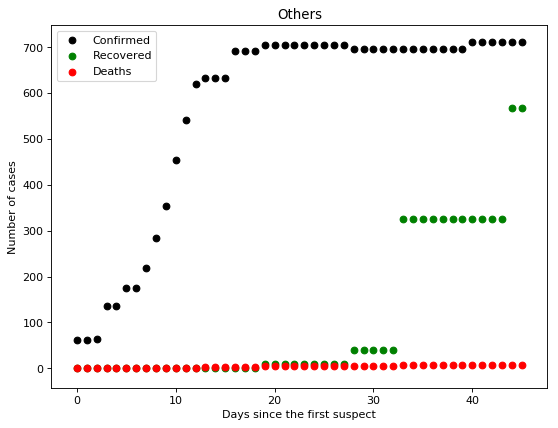

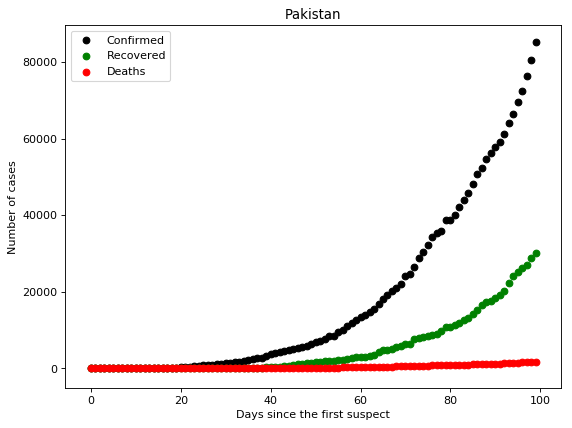

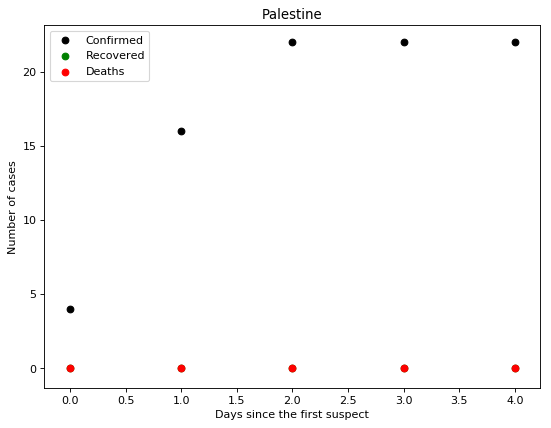

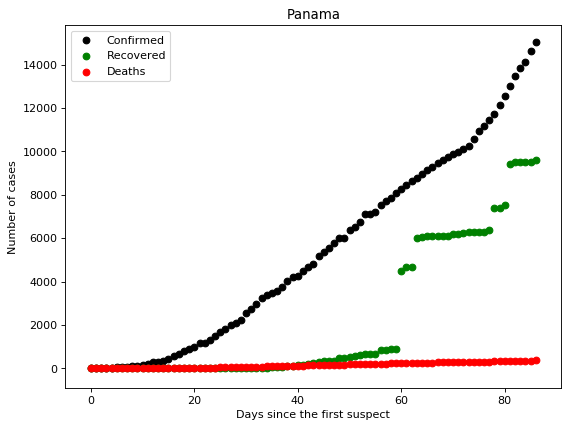

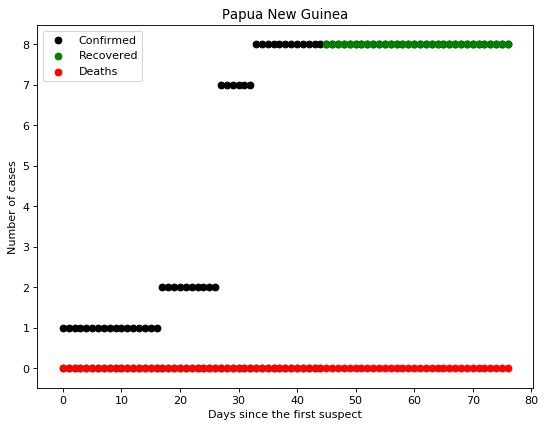

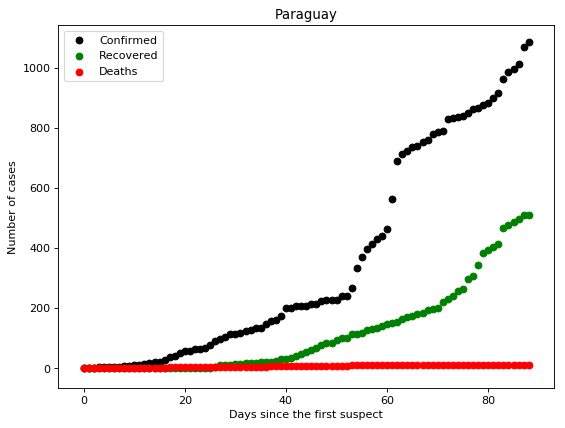

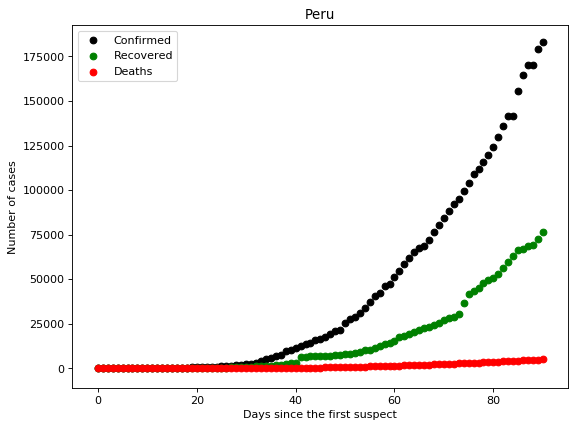

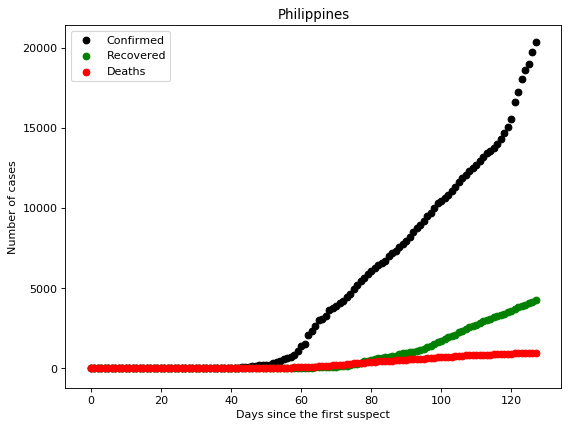

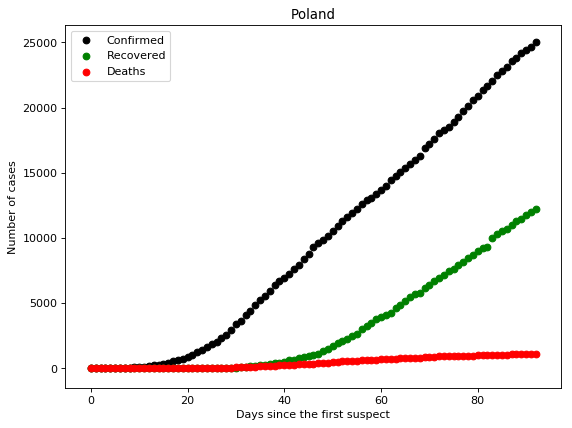

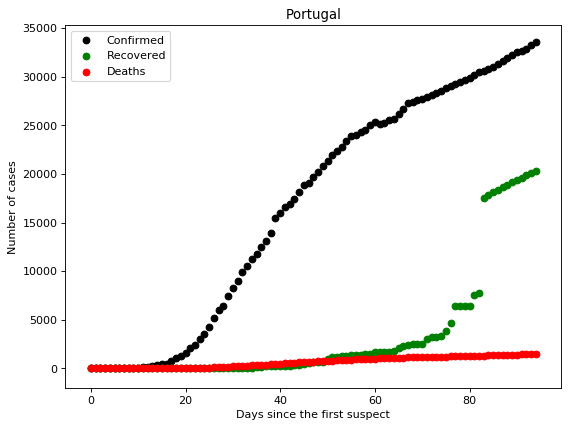

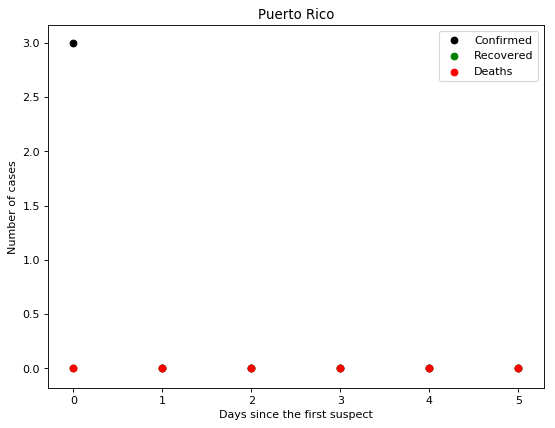

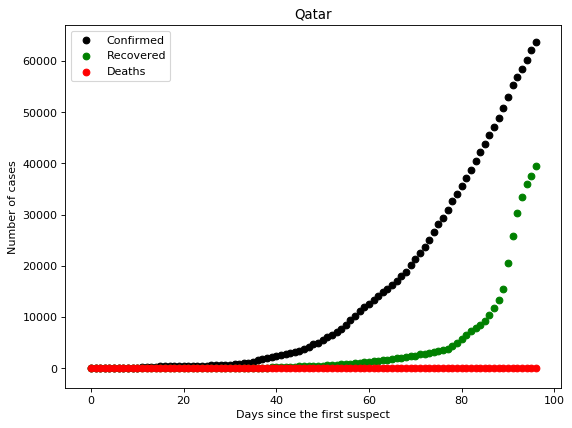

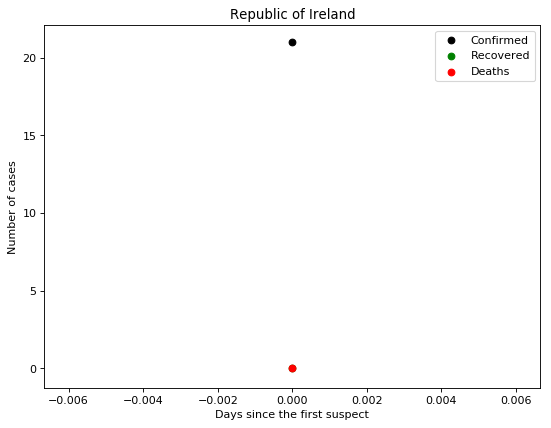

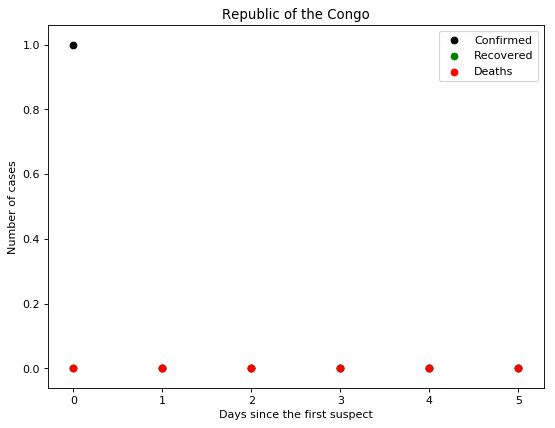

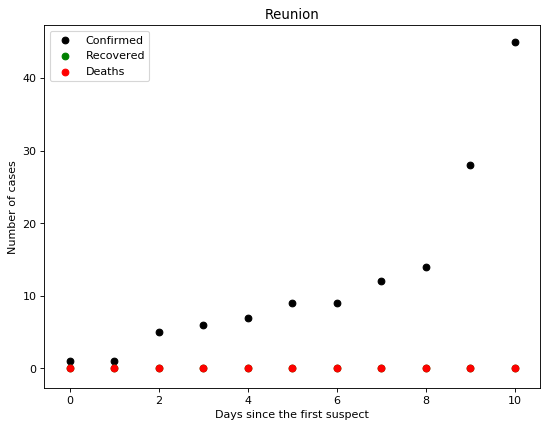

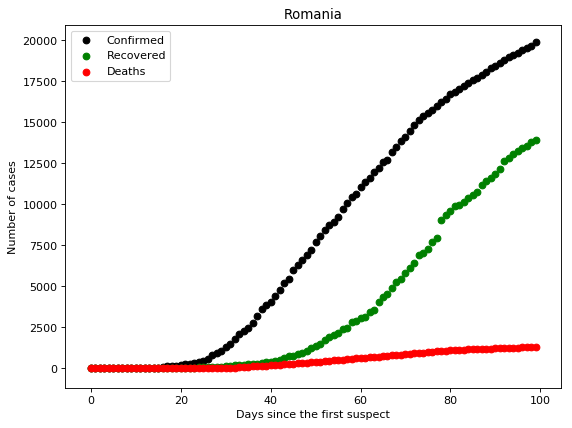

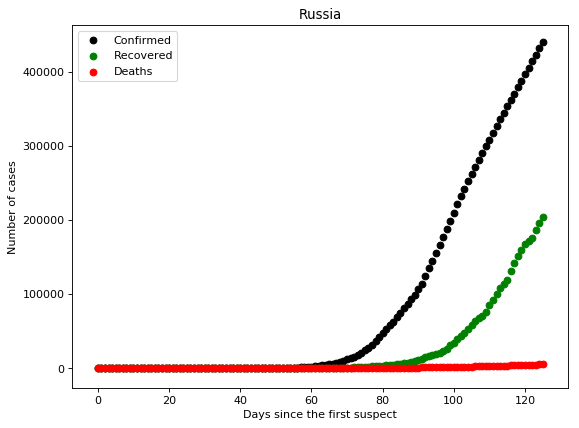

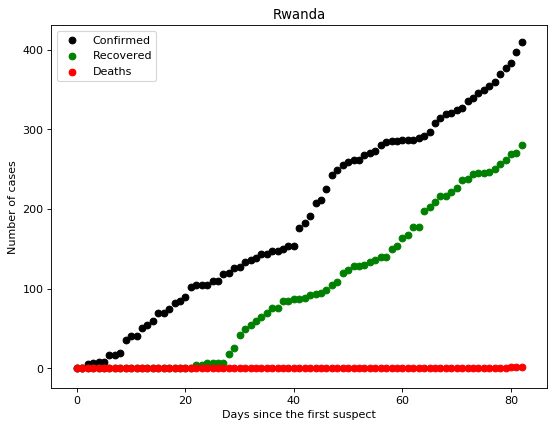

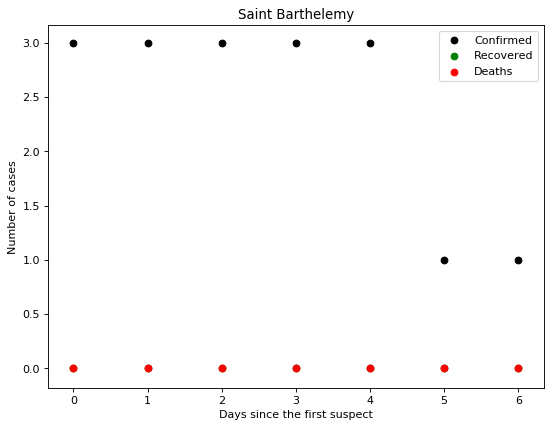

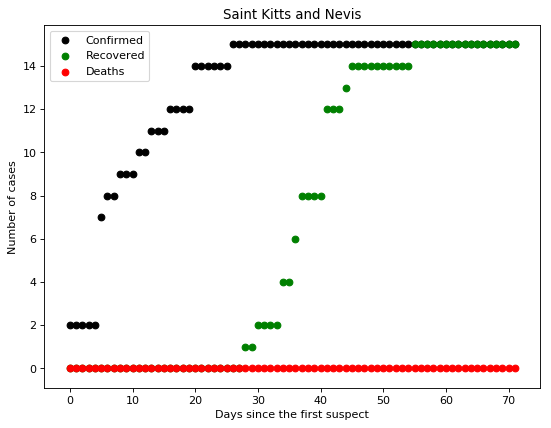

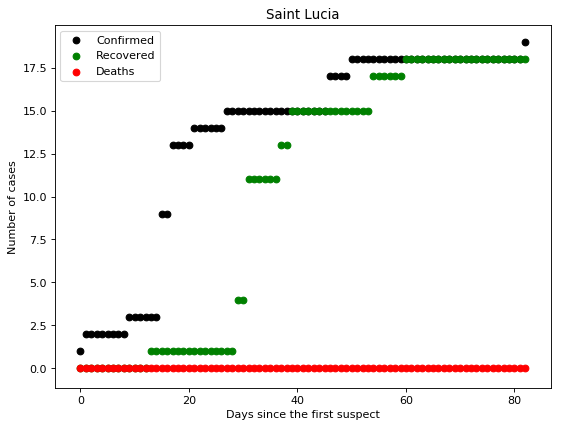

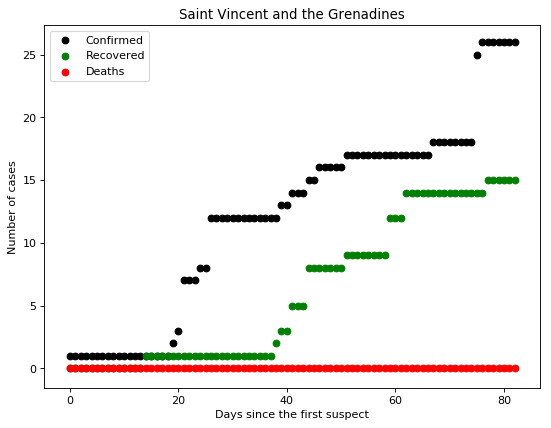

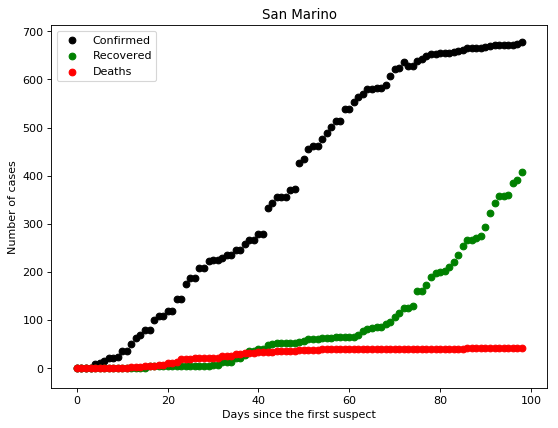

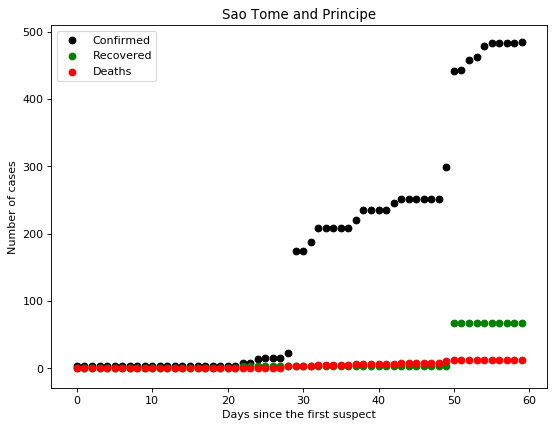

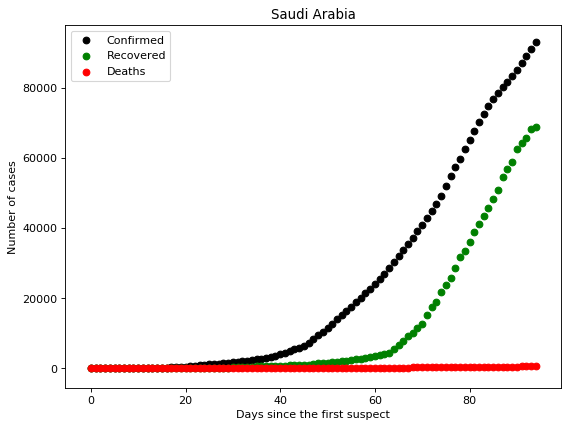

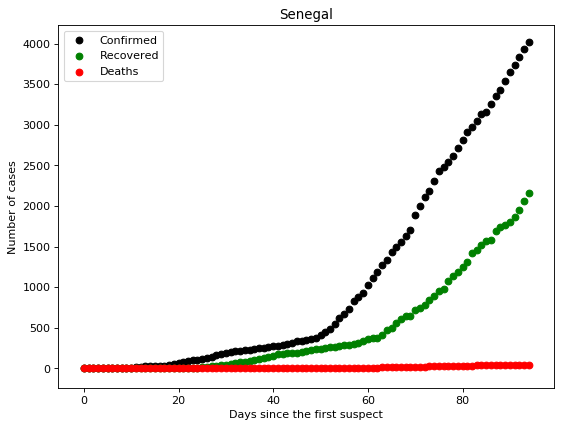

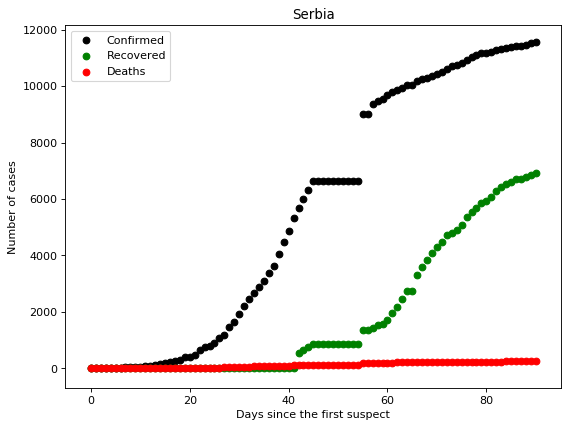

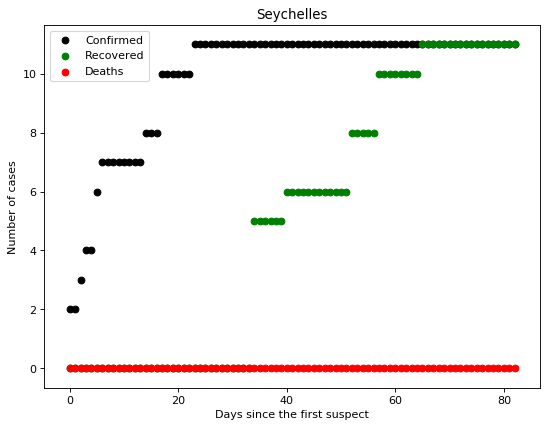

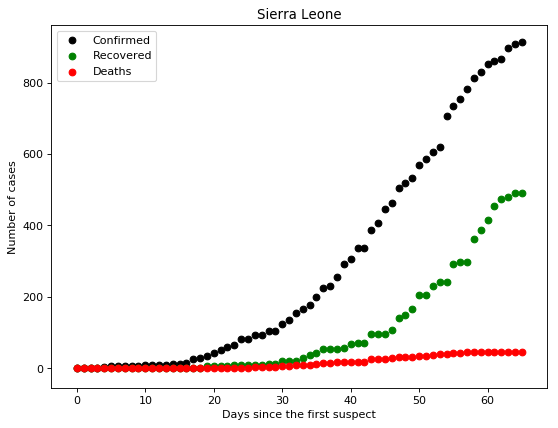

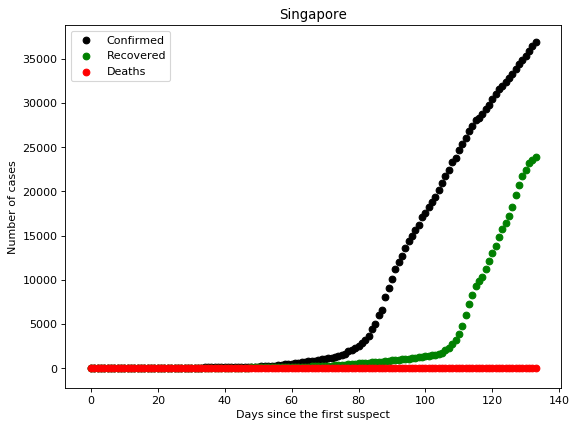

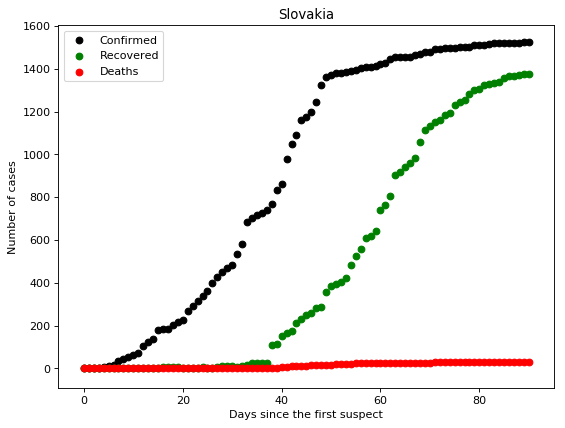

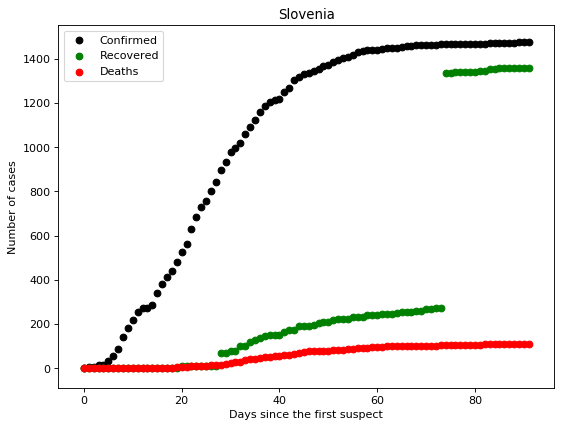

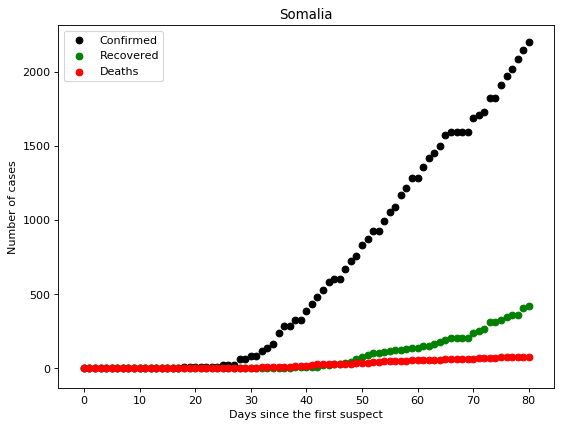

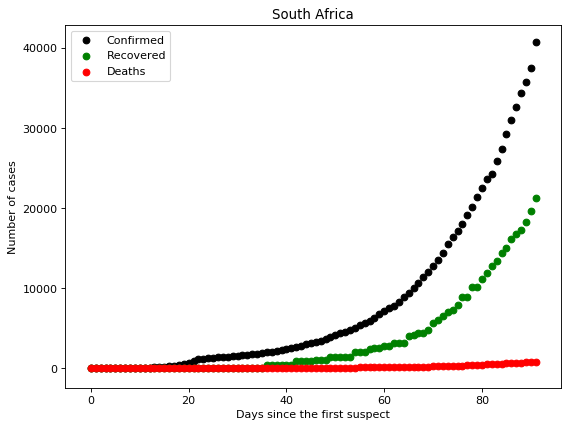

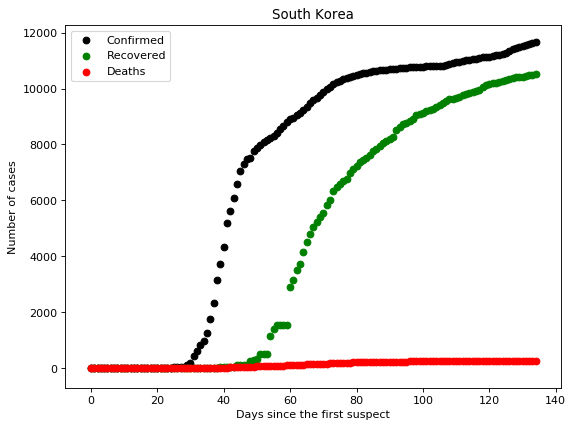

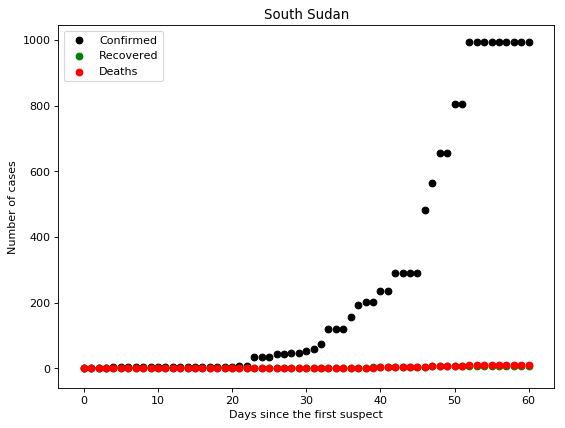

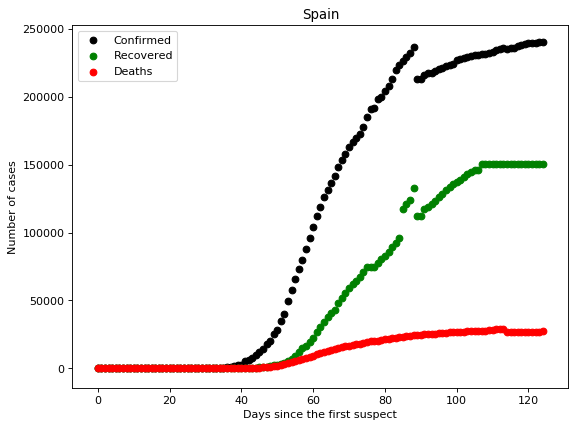

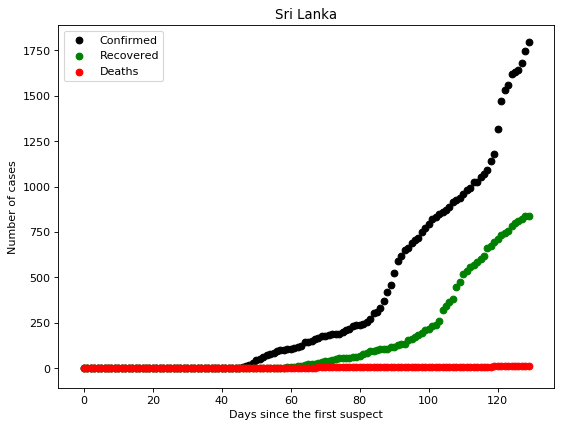

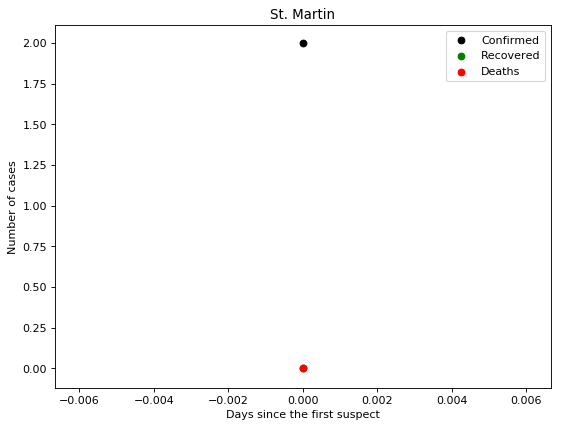

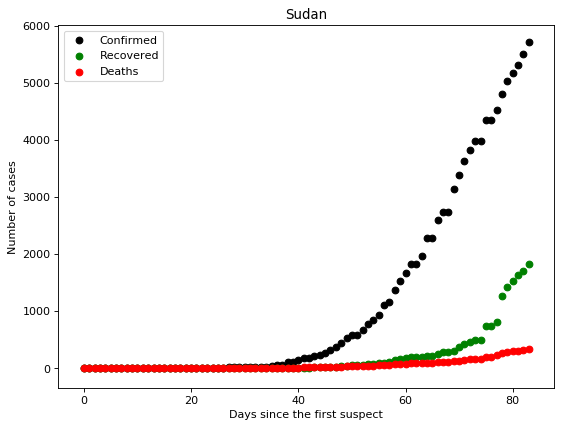

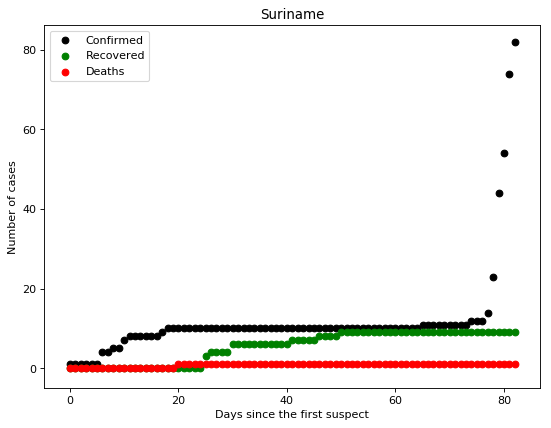

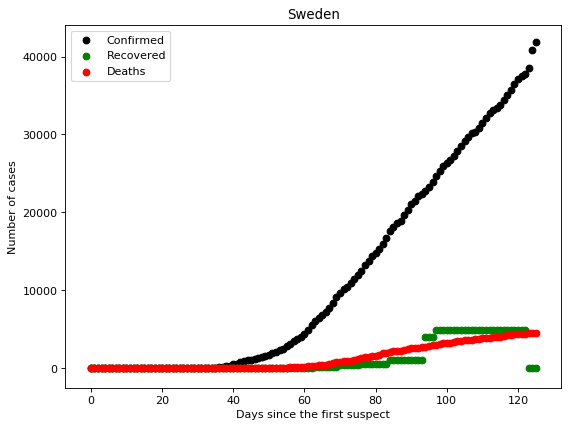

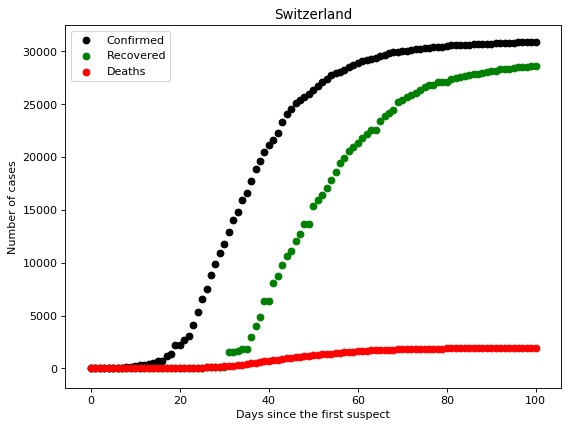

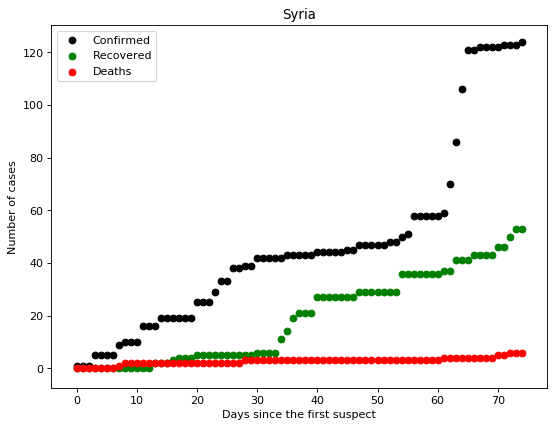

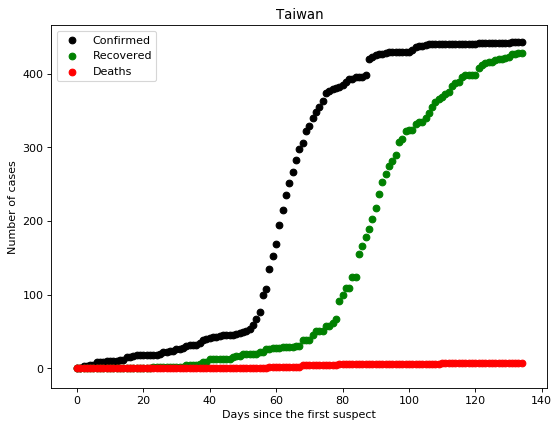

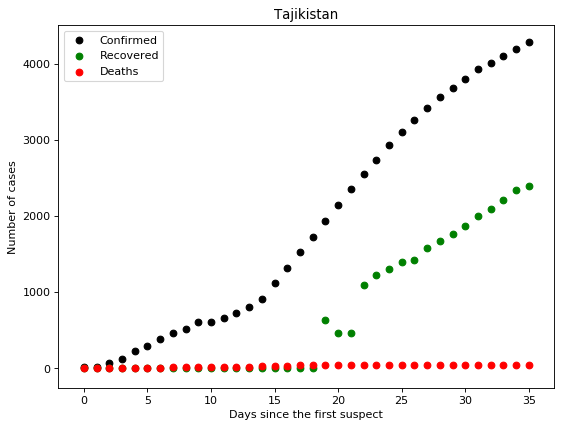

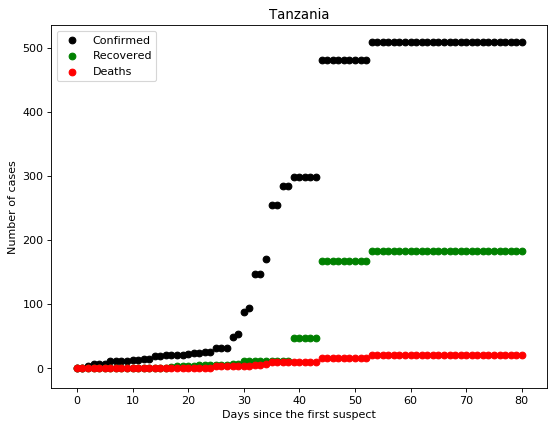

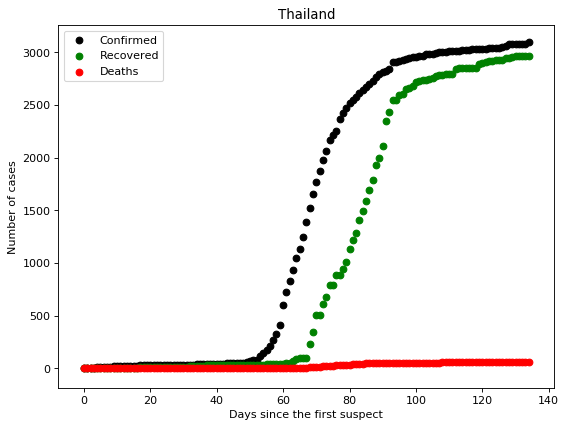

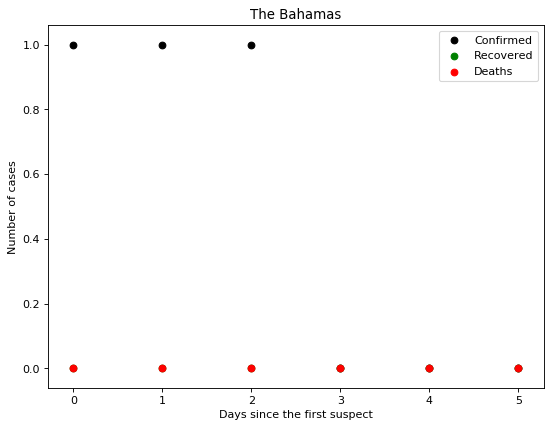

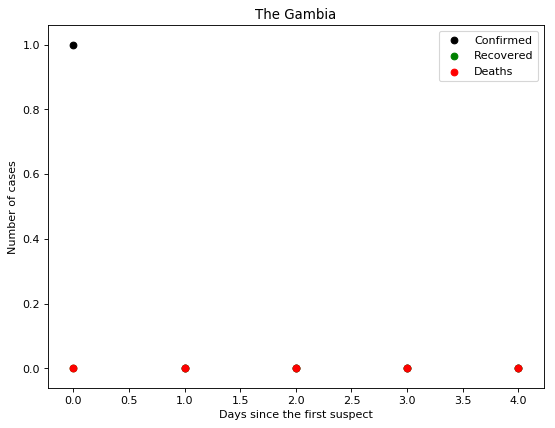

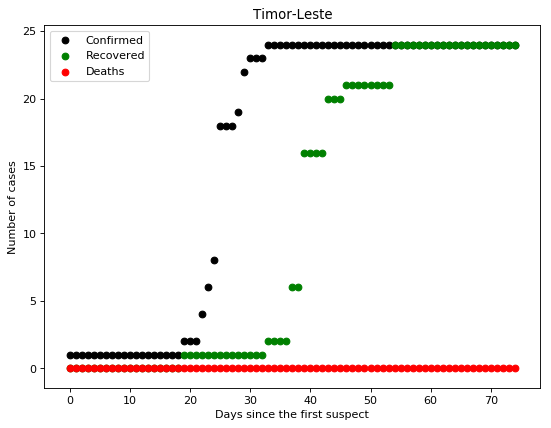

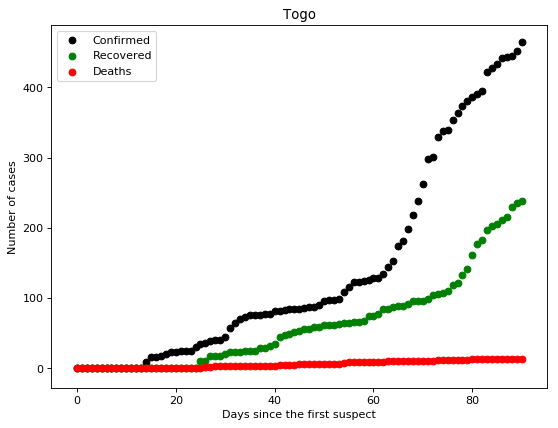

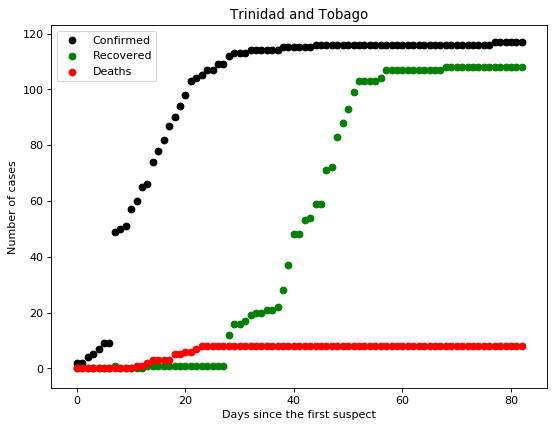

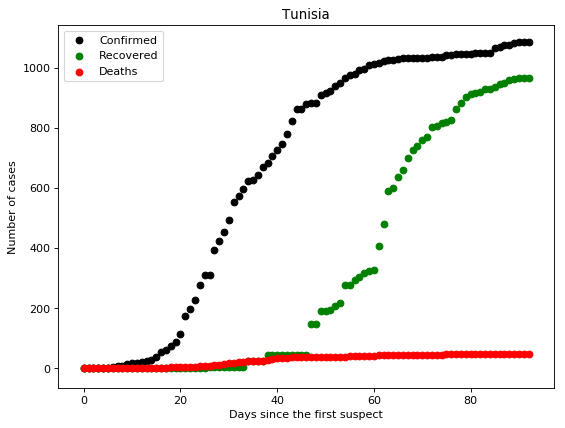

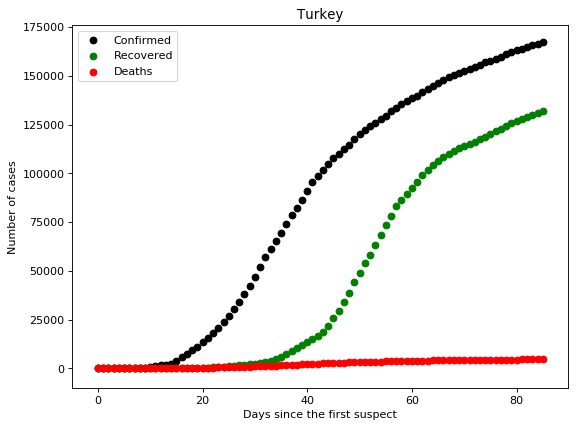

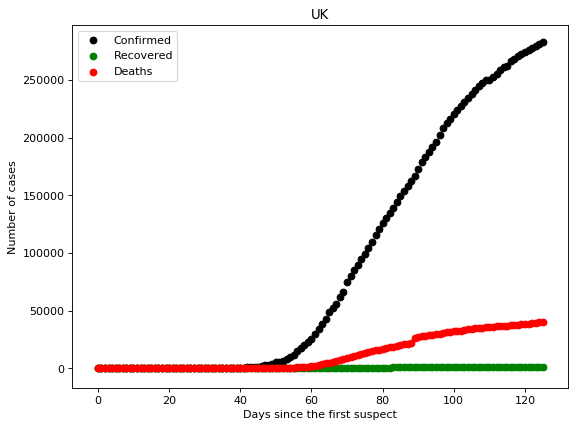

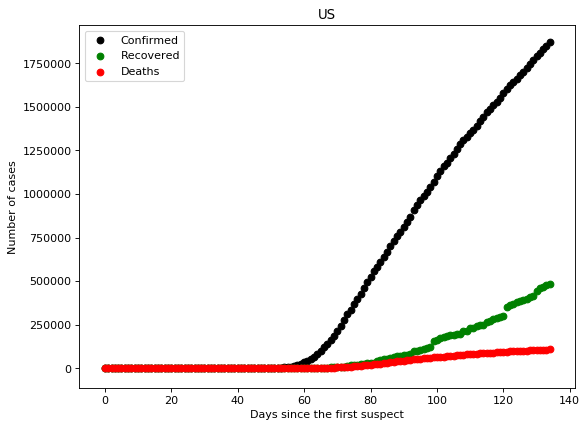

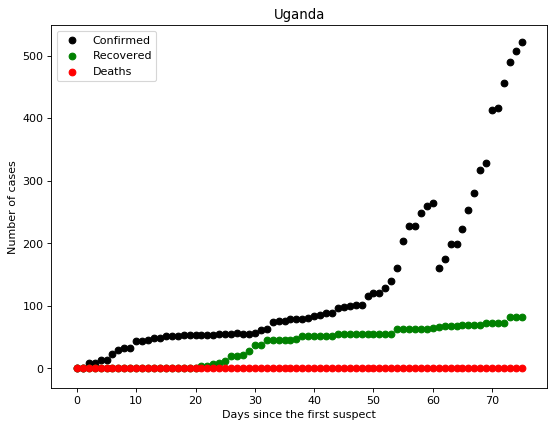

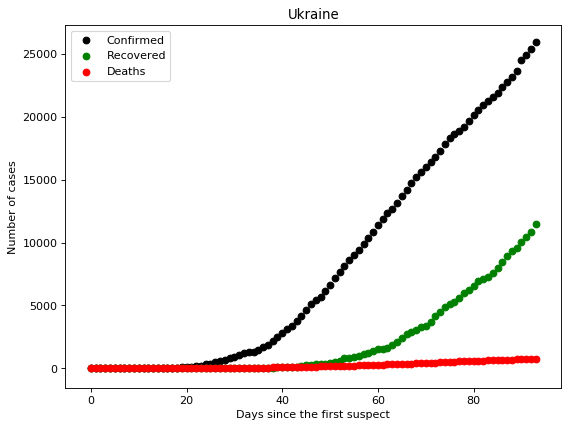

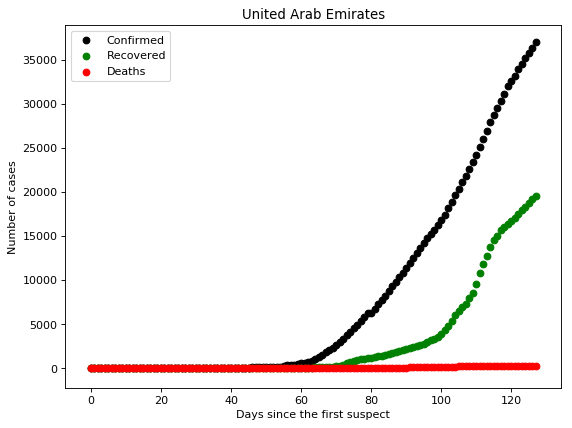

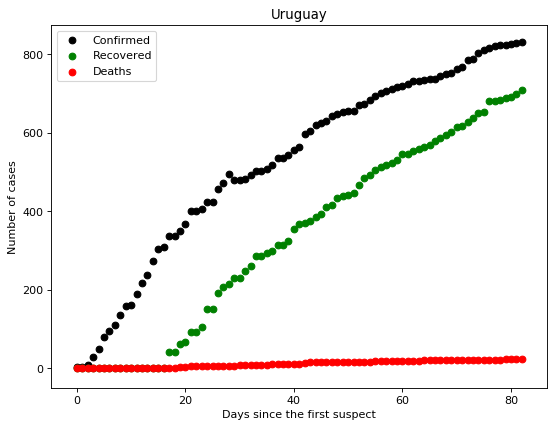

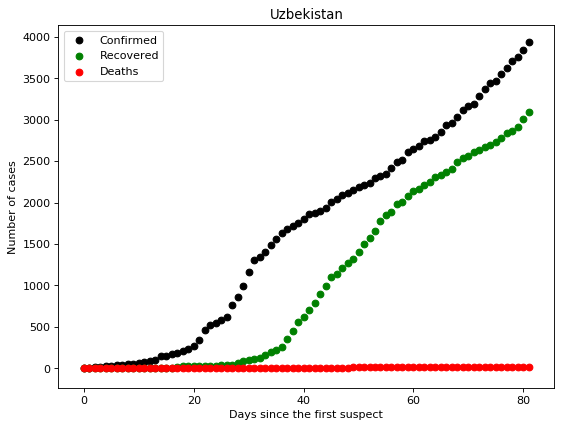

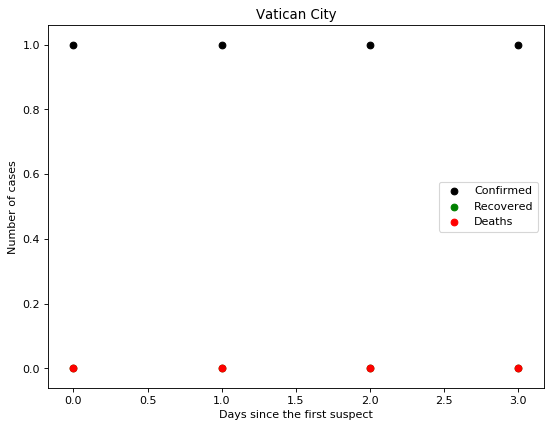

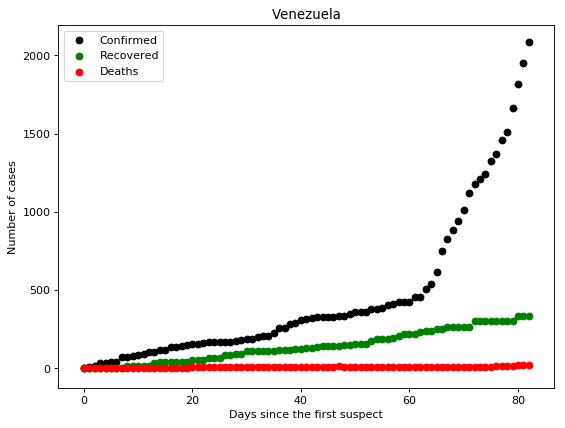

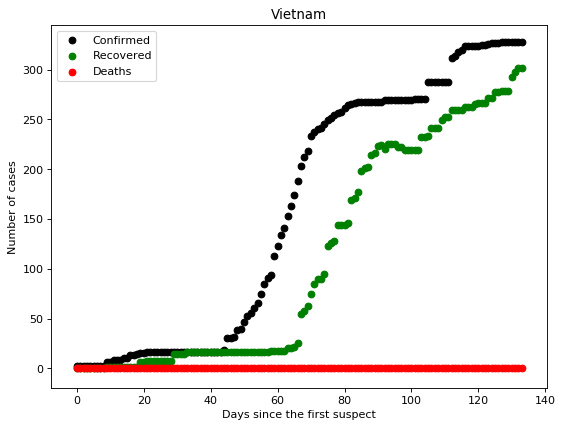

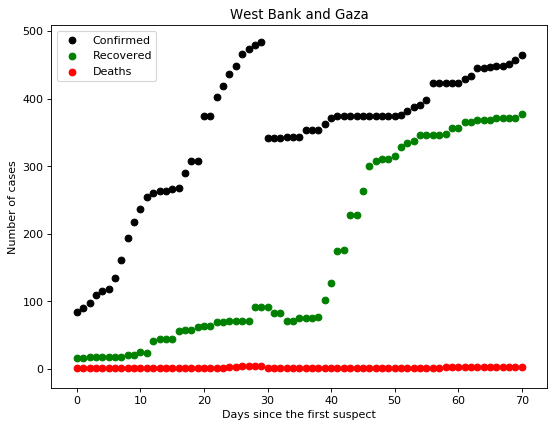

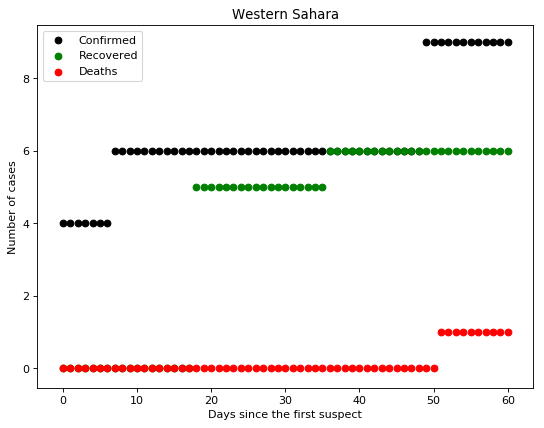

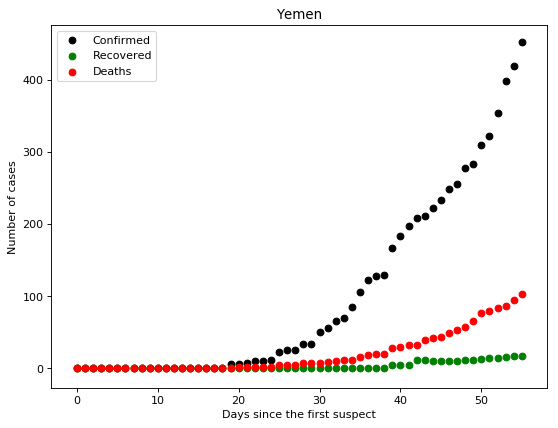

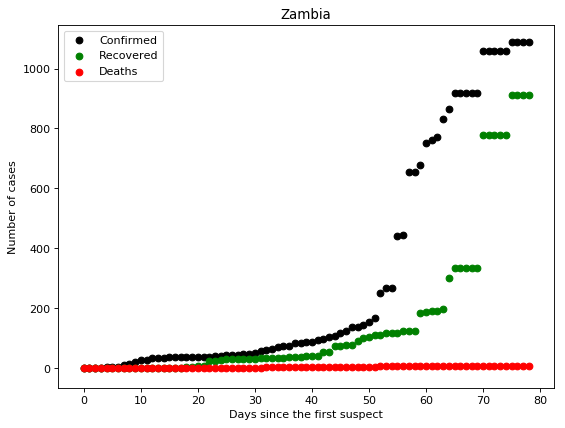

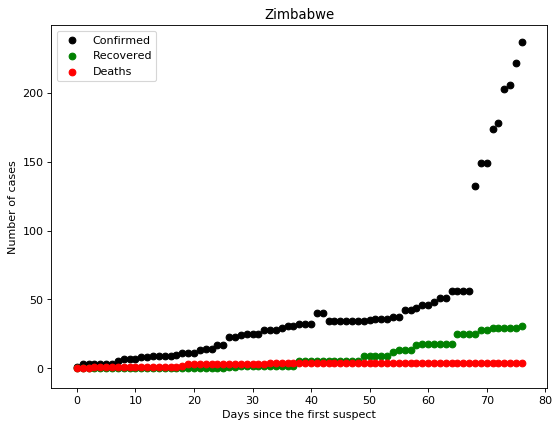

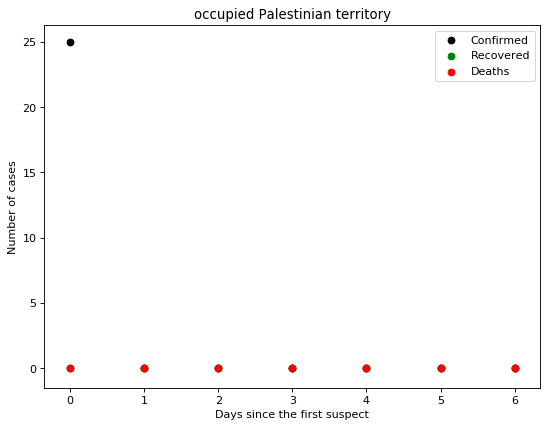

In [59]:
for i in range(0,len(countries)):    
    C = df3[df3['Country']==countries[i]].reset_index()  
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='black',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[i])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [ ]:
df4 = df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()
len(df4)

In [61]:
"""plt.scatter(np.arange(0,len(df4)),df4['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(df4)),df4['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(df4)),df4['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()"""

"plt.scatter(np.arange(0,len(df4)),df4['Confirmed'],color='blue',label='Confirmed')\nplt.scatter(np.arange(0,len(df4)),df4['Recovered'],color='green',label='Recovered')\nplt.scatter(np.arange(0,len(df4)),df4['Deaths'],color='red',label='Deaths')\nplt.title('World')\nplt.xlabel('Days since the first suspect')\nplt.ylabel('Number of cases')\nplt.legend()\nplt.show()"

In [ ]:
figure(num=None, figsize=(8, 6), dpi=100, facecolor='wheat', edgecolor='k')
plt.plot(np.arange(0,len(df4)),df4['Confirmed'],color='black',label='Confirmed')
plt.plot(np.arange(0,len(df4)),df4['Recovered'],color='green',label='Recovered')
plt.plot(np.arange(0,len(df4)),df4['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect case')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

In [ ]:
for i in range(0,len(countries)):    
    C = df3[df3['Country']==countries[i]].reset_index()  
    figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(np.arange(0,len(C)),C['Confirmed'],color='black',label='Confirmed')
    plt.plot(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.plot(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[i])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [ ]:
df5=df2.groupby(['State','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [ ]:
df5.head(10)

In [ ]:
state = df5['State'].unique()
len(state)

In [ ]:
for i in range(0,len(state)):    
    C = df5[df5['State']==state[i]].reset_index()  
    figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='black',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(state[i])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [ ]:
df5.head(100)